In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/competitions/probspace_pricing/notebooks

/content/drive/MyDrive/competitions/probspace_pricing/notebooks


In [3]:
import glob
from IPython.display import display
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#import japanize_matplotlib
import seaborn as sns 

In [4]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows", 500)

# データ読み込み

In [5]:
train_df = pd.read_csv("../data/raw/train.csv")
test_df = pd.read_csv("../data/raw/test.csv")
review_df = pd.read_csv("../data/raw/review.csv")

In [6]:
train_df

,ID,OwnerID,OwnerSince,TimeToReply,ReplyRate,AcceptanceRate,IdentityVerified,Verifications,ListingsCount,HasPicture,OwnerDetail,Description,PropertyType,RoomType,MaximumAccommodates,InstantBookable,BathroomsText,Beds,Amenities,Bedrooms,AreaCategory,Latitude,Longitude,Availability,Vacancy30,Vacancy60,Vacancy90,Vacancy365,UserRatingOverall,UserRatingInformation,UserRatingCleanliness,UserRatingCheckin,UserRatingCommunication,UserRatingLocation,UserRatingPrice,NumberOfReviews,NumberOfReviews1m,NumberOfReviews1y,FirstReview,LastReview,ReviewsPerMonth,Price
0,0,15560,2020-03-15,a few days or more,0%,NaN,f,"[""phone""]",0.0,t,NaN,DUEÑO DIRECTO ALQUILA HABITACIONES INDIVIDUALE...,Private room in residential home,Private room,4,t,2 shared baths,4.0,"[""Iron"", ""First aid kit"", ""Lock on bedroom doo...",4.0,Almagro,-34.62,-58.41,t,30,60,89,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,898
1,1,18859,2021-02-05,NaN,NaN,NaN,t,"[""phone"", ""identity_manual""]",1.0,t,NaN,Departamento Ubicado en plena zona de Palermo ...,Entire rental unit,Entire home/apt,4,t,2.5 baths,4.0,"[""Iron"", ""Heating"", ""Kitchen"", ""Fire extinguis...",2.0,Palermo,-34.58,-58.42,t,30,60,90,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,609213
2,2,35677,2016-07-11,NaN,NaN,NaN,f,"[""email"", ""phone"", ""reviews"", ""jumio"", ""offlin...",1.0,t,NaN,The room is furnished and located on the Aalsm...,Private room in rental unit,Private room,1,f,1 bath,1.0,"[""TV"", ""Washer"", ""Hangers"", ""Lock on bedroom d...",1.0,Zuid,52.35,4.85,t,0,0,0,0,4.00,5.00,4.00,5.00,5.00,4.00,4.00,1,0,0,2016-08-23,2016-08-23,0.02,3631
3,3,6930,2012-12-05,a few days or more,0%,0%,f,"[""phone"", ""reviews""]",2.0,t,Me and my family love to travel so we bought v...,<b>The space</b><br />Newly constructed buildi...,Entire condominium (condo),Entire home/apt,4,f,1 bath,2.0,"[""Iron"", ""Heating"", ""Smoke alarm"", ""Dryer"", ""C...",1.0,Palermo,-34.58,-58.42,t,29,59,89,364,4.28,4.71,4.53,4.76,4.88,4.82,4.18,19,0,0,2014-07-22,2018-11-11,0.22,5697
4,4,11872,2016-02-26,within an hour,100%,100%,t,"[""email"", ""phone"", ""reviews"", ""jumio"", ""offlin...",11.0,t,Hola! Somos noelia y matias!!! Departamentos a...,Amazing Studio located in the BEST PLACE of P...,Entire rental unit,Entire home/apt,2,f,1 bath,1.0,"[""Bed linens"", ""Host greets you"", ""Dedicated w...",1.0,Palermo,-34.58,-58.44,t,30,60,90,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,2548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39470,39470,3222,2013-01-08,within an hour,100%,95%,t,"[""email"", ""phone"", ""reviews"", ""jumio"", ""offlin...",8.0,t,Proud owner of Tokyo Family Stays. A professio...,Cleanliness ★★★★★<br />★ Big Group? This large...,Entire residential home,Entire home/apt,10,f,1.5 baths,9.0,"[""Shower gel"", ""Freezer"", ""Dedicated workspace...",4.0,Nakano Ku,35.69,139.68,t,0,29,59,310,4.96,4.96,4.89,4.93,5.00,4.93,4.86,28,0,0,2019-03-05,2019-12-29,0.89,31588
39471,39471,4635,2018-01-10,within an hour,100%,100%,t,"[""email"", ""phone""]",9.0,t,NaN,studio dans un apart hôtel<br /><br /><b>Other...,Entire rental unit,Entire home/apt,2,t,1 bath,2.0,"[""Carbon monoxide alarm"", ""Luggage dropoff all...",1.0,Schaerbeek,50.86,4.37,t,21,49,79,238,4.20,4.56,4.28,4.52,4.60,4.32,4.12,26,0,3,2018-10-27,2018-12-02,0.73,8429
39472,39472,21190,2016-02-10,NaN,NaN,NaN,t,"[""email"", ""phone"", ""facebook"", ""reviews"", ""jum...",1.0,t,NaN,"My place is good for couples, solo adventurers...",Entire rental unit,Entire home/apt,2,f,1 bath,1.0,"[""Single level home"", ""Coffee maker"", ""Long te...",1.0,Bos en Lommer,52.39,4.85,t,0,0,0,0,4.93,4.82,4.89,4.86,4.93,4.50,4.61,29,0,0,2016-12-30,2019-07-15,0.51,11671
39473,39473,14711,2014-11-09,NaN,NaN,NaN,t,"[""email"", ""phone"", ""reviews"", ""manual_offline""...",0.0,t,鶯谷と上野の間にこの3階建ての1戸建を建てて､\n家主居住型で民泊をしております｡\n\n心...,It is a room on the 3rd floor of a

In [7]:
test_df

,ID,OwnerID,OwnerSince,TimeToReply,ReplyRate,AcceptanceRate,IdentityVerified,Verifications,ListingsCount,HasPicture,OwnerDetail,Description,PropertyType,RoomType,MaximumAccommodates,InstantBookable,BathroomsText,Beds,Amenities,Bedrooms,AreaCategory,Latitude,Longitude,Availability,Vacancy30,Vacancy60,Vacancy90,Vacancy365,UserRatingOverall,UserRatingInformation,UserRatingCleanliness,UserRatingCheckin,UserRatingCommunication,UserRatingLocation,UserRatingPrice,NumberOfReviews,NumberOfReviews1m,NumberOfReviews1y,FirstReview,LastReview,ReviewsPerMonth
0,39475,8102,2017-08-27,within a few hours,100%,92%,t,"[""email"", ""phone"", ""reviews"", ""jumio"", ""offlin...",2.0,t,Je suis japonaise qui habite à Bruxelles depui...,Renovated apartment on the third floor of a li...,Entire rental unit,Entire home/apt,3,t,1 bath,2.0,"[""Hangers"", ""Refrigerator"", ""Stove"", ""Shampoo""...",1.0,Bruxelles,50.85,4.38,t,20,50,80,85,4.96,4.89,4.93,4.96,4.93,4.85,4.67,27,0,0,2018-01-11,2020-01-18,0.60
1,39476,2029,2015-11-24,NaN,NaN,NaN,f,"[""email"", ""phone"", ""facebook"", ""reviews""]",2.0,t,NaN,"Bright,charming and new apartment (55m2) in l...",Entire rental unit,Entire home/apt,2,f,1 bath,1.0,"[""Hot water"", ""TV"", ""Hangers"", ""Essentials"", ""...",1.0,Oostelijk Havengebied - Indische Buurt,52.36,4.94,t,0,0,0,0,5.00,5.00,5.00,5.00,5.00,5.00,4.67,3,0,0,2018-09-29,2018-09-15,0.08
2,39477,6602,2016-03-10,within a few hours,89%,63%,t,"[""email"", ""phone"", ""reviews"", ""offline_governm...",12.0,t,"Hello. My name is Lin Yu Wei,. You can call me...",【Brief】A brand new villa located in the centra...,Entire residential home,Entire home/apt,6,t,1.5 baths,2.0,"[""Heating"", ""Long term stays allowed"", ""Washer...",2.0,Shinjuku Ku,35.70,139.69,t,30,60,90,365,4.78,4.78,4.78,4.67,4.67,4.56,4.44,9,0,0,2019-07-09,2019-11-05,0.33
3,39478,30412,2016-09-27,NaN,NaN,NaN,t,"[""email"", ""phone"", ""google"", ""reviews"", ""jumio...",1.0,t,NaN,Beautiful apartment at Amager with one master ...,Entire rental unit,Entire home/apt,2,f,1 bath,2.0,"[""Cooking basics"", ""Game console"", ""Washer"", ""...",1.0,Amager st,55.66,12.61,t,0,0,0,0,4.92,4.92,4.92,5.00,5.00,4.92,4.75,13,0,0,2019-04-30,2019-03-24,0.44
4,39479,26339,2015-12-22,NaN,NaN,NaN,t,"[""email"", ""phone"", ""facebook"", ""reviews""]",1.0,t,NaN,<b>Other things to note</b><br />No music afte...,Entire rental unit,Entire home/apt,2,t,1 bath,1.0,"[""Washer"", ""Essentials"", ""Long term stays allo...",1.0,De Baarsjes - Oud-West,52.37,4.87,t,0,0,0,0,4.67,4.89,5.00,5.00,5.00,4.67,4.67,9,0,0,2018-07-10,2017-09-28,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30281,69756,18662,2016-07-29,NaN,NaN,NaN,t,"[""email"", ""phone"", ""facebook"", ""reviews"", ""sel...",1.0,t,"Hi!\r\n\r\nNice to meet you, we are Rink and I...",Small house in Amsterdam 'Noord' <br />The pla...,Entire residential home,Entire home/apt,2,t,1 bath,1.0,"[""Coffee maker"", ""Backyard"", ""Bed linens"", ""Wi...",1.0,Noord-West,52.42,4.89,t,0,0,0,0,4.86,4.91,4.68,4.91,4.82,4.41,4.59,22,0,0,2017-12-10,2018-07-22,0.48
30282,69757,29836,2020-10-01,within an hour,100%,67%,t,"[""email"", ""phone"", ""jumio"", ""offline_governmen...",2.0,t,NaN,NaN,Private room in residential home,Private room,1,f,1 private bath,1.0,"[""Lock on bedroom door"", ""Wifi"", ""Hot water"", ...",NaN,NANNUP,-33.98,115.77,t,23,49,79,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN
30283,69758,30781,2016-08-05,NaN,NaN,100%,f,"[""email"", ""phone""]",1.0,t,Im Asal 29 years old. living/working in Amster...,Modern and light apartment 4 minutes walk from...,Entire rental unit,Entire home/apt,2,f,1 bath,1.0,"[""Coffee maker"", ""Long term stays allowed"", ""P...",1.0,Zuid,52.35,4.85,t,27,57,87,177,4.00,5.00,5.00,5.00,5.00,5.00,4.00,1,0,0,2019-04-28,2019-04-28,0.03
30284,69759,16312,2015-09-16,within an hour,100%,NaN,f,"[""email"", ""phone"", ""reviews"", ""j

In [8]:
review_df

,ID,ReviewerId,ReviewerName,Review
0,6,12789,Maria Pilar,"El departamento tiene una ubicación excelente,..."
1,6,52100,Vanina,"Muy buena atencion, limpieza y lugar excelente"
2,6,179615,Héctor,El lugar tiene una ubicació excelente de fáci...
3,6,13922,Adrian,10 puntos
4,6,31359,Maximiliano,"lindo dpto, zona excelente."
...,...,...,...,...
246880,69760,79345,Tynan,This place is lovely. It is perfectly located ...
246881,69760,146400,Deirdre,The cottage is amazing. We fell in love with i...
246882,69760,141354,L,"Outstanding property, I'm sure I'm not alone i..."
246883,69760,174400,Simon,Fantastically located heritage listed property...



# Sweetviz

In [9]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.0 MB/s 


In [10]:
# 必要なライブラリーのインポート
import pandas as pd
import numpy as np
import sweetviz as sv

In [11]:
my_report = sv.compare([train_df, "Train"], [test_df, "Test"], "Price")

#直接ブラウザに表示
my_report.show_html("sweetviz_report_2col.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report_2col.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 型、項目数、欠損値率

In [12]:
dtypes = []
val_counts_train = []
val_counts_test = []
isnull_train = []
isnull_test = []
isnull_train_ratio = 100 * train_df.isnull().sum() / len(train_df)
isnull_test_ratio = 100 * test_df.isnull().sum() / len(test_df)
for col in test_df.columns:
    dtypes.append(str(train_df[col].dtype))
    val_counts_train.append(len(train_df[col].value_counts()))
    val_counts_test.append(len(test_df[col].value_counts()))
    isnull_train.append(isnull_train_ratio[col])
    isnull_test.append(isnull_test_ratio[col])

In [13]:
inds = ["型", "val_counts_train", "val_counts_test", "NaN率_train", "NaN率_test"]
df_eda = pd.DataFrame([dtypes, val_counts_train, val_counts_test, isnull_train, isnull_test], columns=test_df.columns, index=inds).T
df_eda.query("val_counts_train > 1")

,型,val_counts_train,val_counts_test,NaN率_train,NaN率_test
ID,int64,39475,30286,0.0,0.0
OwnerID,int64,27167,21073,0.0,0.0
OwnerSince,object,3934,3766,0.060798,0.039622
TimeToReply,object,4,4,42.834706,33.962887
ReplyRate,object,76,65,42.834706,33.962887
AcceptanceRate,object,96,97,45.332489,31.479892
IdentityVerified,object,2,2,0.060798,0.039622
Verifications,object,521,472,0.0,0.0
ListingsCount,float64,95,85,0.060798,0.039622
HasPicture,object,2,2,0.060798,0.039622


In [14]:
review_df[review_df["Review"].isnull()==True].sort_values("ID")

,ID,ReviewerId,ReviewerName,Review
1807,832,163499,Rakhmatullokh,NaN
2044,940,67736,Mario,NaN
3420,1373,59943,Helge,NaN
4105,1674,148265,Jalal,NaN
4167,1683,39971,Manon,NaN
4153,1683,40038,Nicola,NaN
4172,1683,135831,Sabriya,NaN
4823,2003,67839,Jona,NaN
5274,2165,147657,Line,NaN
6723,2766,113913,れみ,NaN


# 基本統計量

In [15]:
train_df.describe()

,ID,OwnerID,ListingsCount,MaximumAccommodates,Beds,Bedrooms,Latitude,Longitude,Vacancy30,Vacancy60,Vacancy90,Vacancy365,UserRatingOverall,UserRatingInformation,UserRatingCleanliness,UserRatingCheckin,UserRatingCommunication,UserRatingLocation,UserRatingPrice,NumberOfReviews,NumberOfReviews1m,NumberOfReviews1y,ReviewsPerMonth,Price
count,39475.000000,39475.000000,39451.000000,39475.000000,39104.000000,35389.000000,39475.000000,39475.000000,39475.000000,39475.000000,39475.000000,39475.000000,30250.000000,29795.000000,29794.000000,29790.000000,29794.000000,29790.000000,29787.000000,39475.000000,39475.000000,39475.000000,30250.000000,3.947500e+04
mean,19737.000000,17755.538138,8.243391,3.092286,1.967957,1.453418,9.526596,-5.165118,13.980621,30.509411,48.070855,166.375883,4.661895,4.794650,4.678726,4.852408,4.852784,4.797959,4.660863,21.354832,0.282229,2.216035,0.792109,1.219388e+04
std,11395.595275,13749.728872,29.170968,1.882383,1.796111,1.013591,41.936008,65.385915,13.289772,26.450739,39.290015,141.526851,0.699995,0.395988,0.470987,0.346791,0.359461,0.337486,0.428273,45.046948,1.265054,7.909761,1.230162,6.475726e+04
min,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,-35.040000,-58.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.950000e+02
25%,9868.500000,4966.000000,1.000000,2.000000,1.000000,1.000000,-34.590000,-58.410000,0.000000,0.000000,0.000000,11.000000,4.630000,4.750000,4.570000,4.830000,4.850000,4.720000,4.550000,1.000000,0.000000,0.000000,0.150000,3.242000e+03
50%,19737.000000,15177.000000,1.000000,2.000000,1.000000,1.000000,35.670000,4.360000,13.000000,33.000000,59.000000,151.000000,4.840000,4.910000,4.820000,4.960000,4.970000,4.910000,4.750000,6.000000,0.000000,0.000000,0.400000,6.922000e+03
75%,29605.500000,29172.000000,4.000000,4.000000,2.000000,2.000000,52.360000,12.520000,29.000000,59.000000,89.000000,331.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.930000,22.000000,0.000000,1.000000,0.980000,1.457100e+04
max,39474.000000,45580.000000,1992.000000,16.000000,90.000000,50.000000,55.730000,139.910000,30.000000,60.000000,90.000000,365.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,866.000000,106.000000,422.000000,48.000000,1.107649e+07


# Price

目的変数、1泊の価格（複数の国のデータを結合させているため為替レートに準じて円に変換しています）

・100万越えの施設がいくつかあるが、データから判断はできなそう→後処理

・外れ値は削除か後処理か

In [16]:
print(train_df["Price"].mean())
print(train_df["Price"].mode()[0])

12193.881494616846
3323


10万以下の分布

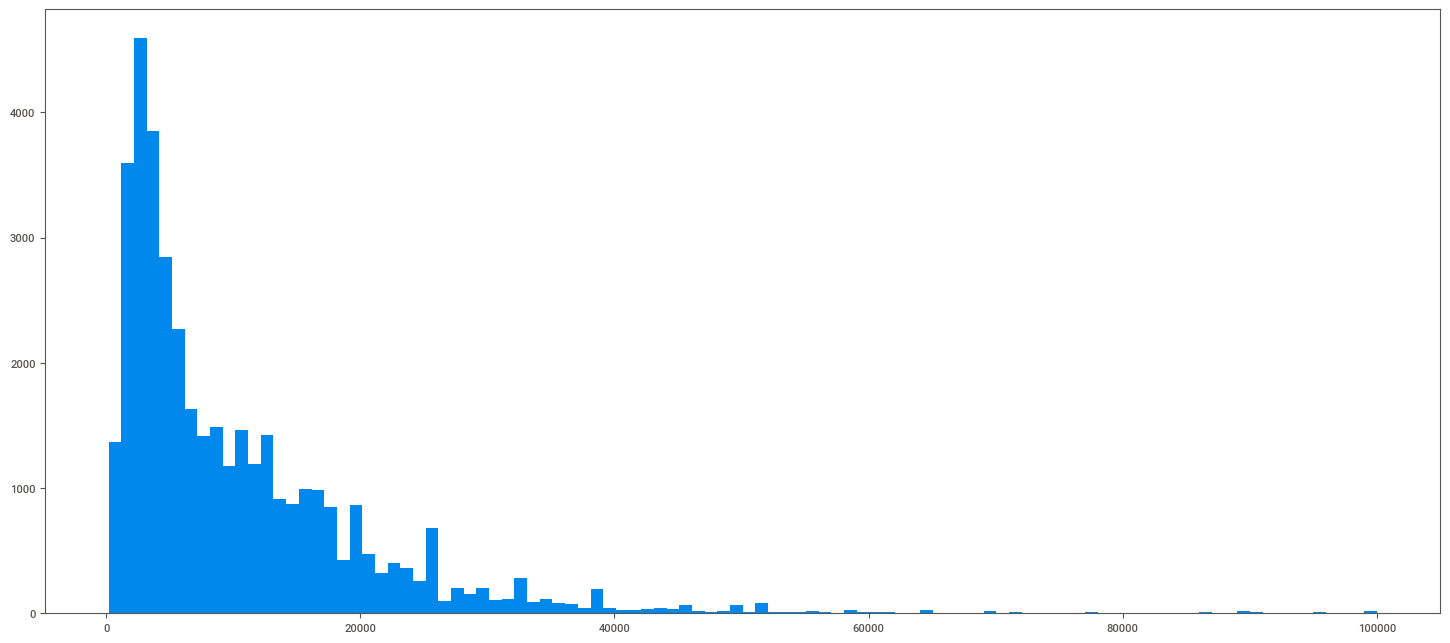

In [17]:
plt.figure(figsize=(18,8))
plt.hist(train_df[train_df["Price"]<=100000]["Price"], bins=100)
plt.show()

１０万以上の分布

外れ値がある

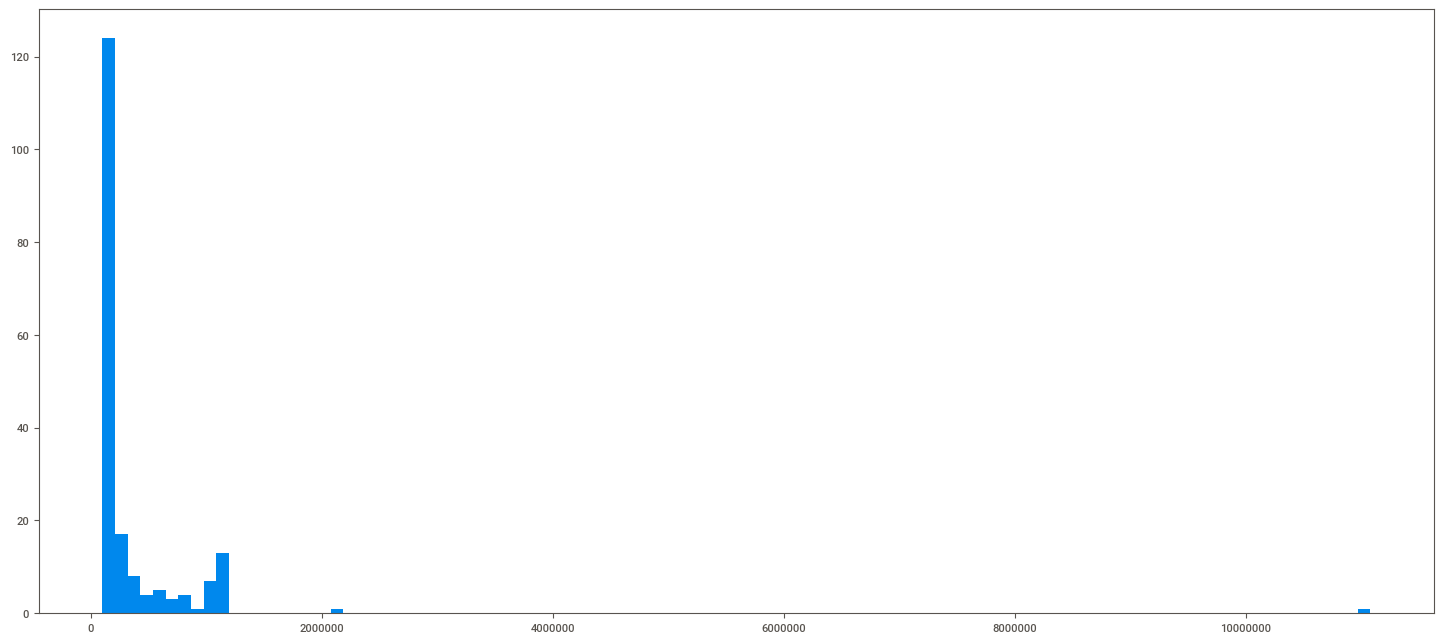

In [18]:
plt.figure(figsize=(18,8))
plt.hist(train_df[train_df["Price"]>100000]["Price"], bins=100)
plt.ticklabel_format(style='plain',axis="x")
plt.show()

100万越えの高額施設

In [19]:
train_df.query("Price>1000000")

,ID,OwnerID,OwnerSince,TimeToReply,ReplyRate,AcceptanceRate,IdentityVerified,Verifications,ListingsCount,HasPicture,OwnerDetail,Description,PropertyType,RoomType,MaximumAccommodates,InstantBookable,BathroomsText,Beds,Amenities,Bedrooms,AreaCategory,Latitude,Longitude,Availability,Vacancy30,Vacancy60,Vacancy90,Vacancy365,UserRatingOverall,UserRatingInformation,UserRatingCleanliness,UserRatingCheckin,UserRatingCommunication,UserRatingLocation,UserRatingPrice,NumberOfReviews,NumberOfReviews1m,NumberOfReviews1y,FirstReview,LastReview,ReviewsPerMonth,Price
2324,2324,5068,2016-11-27,within a few hours,100%,100%,f,"[""email"", ""phone"", ""facebook"", ""reviews""]",8.0,t,Me encanta recibir personas y hacerlos sentir ...,"Departamento de 60m2 con living, cocina, habit...",Entire rental unit,Entire home/apt,4,f,1 bath,3.0,"[""Iron"", ""Free street parking"", ""Crib"", ""TV"", ...",1.0,Monte Castro,-34.61,-58.51,t,29,59,89,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,1097622
4178,4178,19484,2019-04-17,NaN,NaN,100%,t,"[""email"", ""phone"", ""work_email""]",3.0,t,NaN,Key HOTELS San Telmo ofrece una ubicación priv...,Room in hotel,Hotel room,2,t,1 private bath,1.0,"[""First aid kit"", ""Paid parking on premises"", ...",1.0,Monserrat,-34.62,-58.38,t,0,0,0,190,3.33,3.67,4.00,3.67,3.67,2.67,3.33,3,0,0,2019-06-30,2020-01-25,0.11,1107548
6864,6864,19484,2019-04-17,NaN,NaN,100%,t,"[""email"", ""phone"", ""work_email""]",3.0,t,NaN,Key HOTELS San Telmo ofrece una ubicación priv...,Room in hotel,Hotel room,3,t,1 private bath,2.0,"[""First aid kit"", ""Paid parking on premises"", ...",1.0,Monserrat,-34.62,-58.38,t,0,0,0,191,5.00,5.00,4.00,5.00,5.00,5.00,5.00,1,0,0,2019-08-11,2019-08-11,0.04,1110914
8701,8701,25689,2019-07-24,NaN,NaN,NaN,t,"[""email"", ""phone"", ""jumio"", ""offline_governmen...",0.0,t,Hi! I am Daiki!\nThank you for checking my pro...,Welcome to my room ♪<br />My apartment is loca...,Entire rental unit,Entire home/apt,8,t,1 bath,1.0,"[""Heating"", ""Room-darkening shades"", ""Hot wate...",1.0,Nakano Ku,35.71,139.69,t,0,0,28,118,5.00,4.78,4.56,4.78,4.89,4.78,4.89,9,0,0,2019-11-17,2020-02-29,0.39,2185000
11670,11670,593,2013-02-13,NaN,NaN,NaN,f,"[""email"", ""phone"", ""facebook"", ""reviews""]",8.0,t,BA Stop Hostel en Buenos Aires esta ubicado en...,Habitación twin (dos camas) con baño privado. ...,Room in bed and breakfast,Hotel room,2,t,1 bath,2.0,"[""Iron"", ""First aid kit"", ""Heating"", ""Kitchen""...",1.0,Monserrat,-34.61,-58.38,t,25,25,25,25,4.14,4.50,4.33,4.29,4.29,4.71,4.43,7,0,0,2017-11-03,2018-06-03,0.15,1107591
14702,14702,21523,2018-10-08,within a day,100%,NaN,f,"[""email"", ""phone"", ""offline_government_id"", ""g...",5.0,t,Persona vinculada al turismo y la hotelería de...,Independencia 1302 by HB is a temporary rental...,Entire rental unit,Entire home/apt,2,t,1 bath,1.0,"[""BBQ grill"", ""Bed linens"", ""Dedicated workspa...",NaN,Constitucion,-34.62,-58.39,t,6,6,30,305,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2,0,0,2019-07-02,2019-04-22,0.07,1107591
14968,14968,16194,2019-06-30,within a day,100%,100%,t,"[""phone"", ""jumio"", ""offline_government_id"", ""g...",1.0,t,NaN,"Beautiful minimalist apartment, with strategic...",Entire rental unit,Entire home/apt,7,f,2.5 baths,5.0,"[""Bed linens"", ""Dedicated workspace"", ""Hangers...",4.0,Palermo,-34.58,-58.42,t,28,56,84,359,4.52,4.55,4.42,4.76,4.76,4.82,4.24,34,0,1,2019-07-19,2019-10-26,1.27,1107659
15242,15242,593,2013-02-13,NaN,NaN,NaN,f,"[""email"", ""phone"", ""facebook"", ""reviews""]",8.0,t,BA Stop Hostel en Buenos Aires esta ubicado en...,BA Stop es un Hostel en Buenos Aires ubicado e...,Room in bed and breakfast,Hotel room,1,t,1 bath,6.0,"[""Heating"", ""Kitchen"", ""Fire extinguisher"", ""D...",1.0,San Nicolas,-34.61,-58.38,t,26,26,26,26,4.70,4.80,4.70,5.00,4.80,4.80,4.80,10,0,0,2018-05-26,2018-12-13,0.25,11076486
19463,19463,593,2013-02-13,NaN,NaN,NaN,f,"[""email"", ""phone"", ""facebook"", ""reviews""]",8.0,t,BA Stop Hostel en Buenos Aires esta ubicado en...,Ha

In [20]:
train_df.query("Price>1000000")["Description"].iloc[-1]

'Nice and cozy fully furnished apartment with everything you need for a short or longer stay. The Apartment has 2 spacey bedrooms and a living room with sleeping options as well.<br />Connected to the kitchen is a balcony with a very green view.<br /><br />Frederiksberg is an exclusive quiet upscale neighborhood, but very centrally located to the city center!<br />The central station can be reached in 5-8 minutes by bus and 15-20 minutes by walk. <br />Shopping and many food options are just around the corner!<br /><br /><b>The space</b><br />125 sqm apartment with an open kitchen and balcony.'



中央値以下の分布

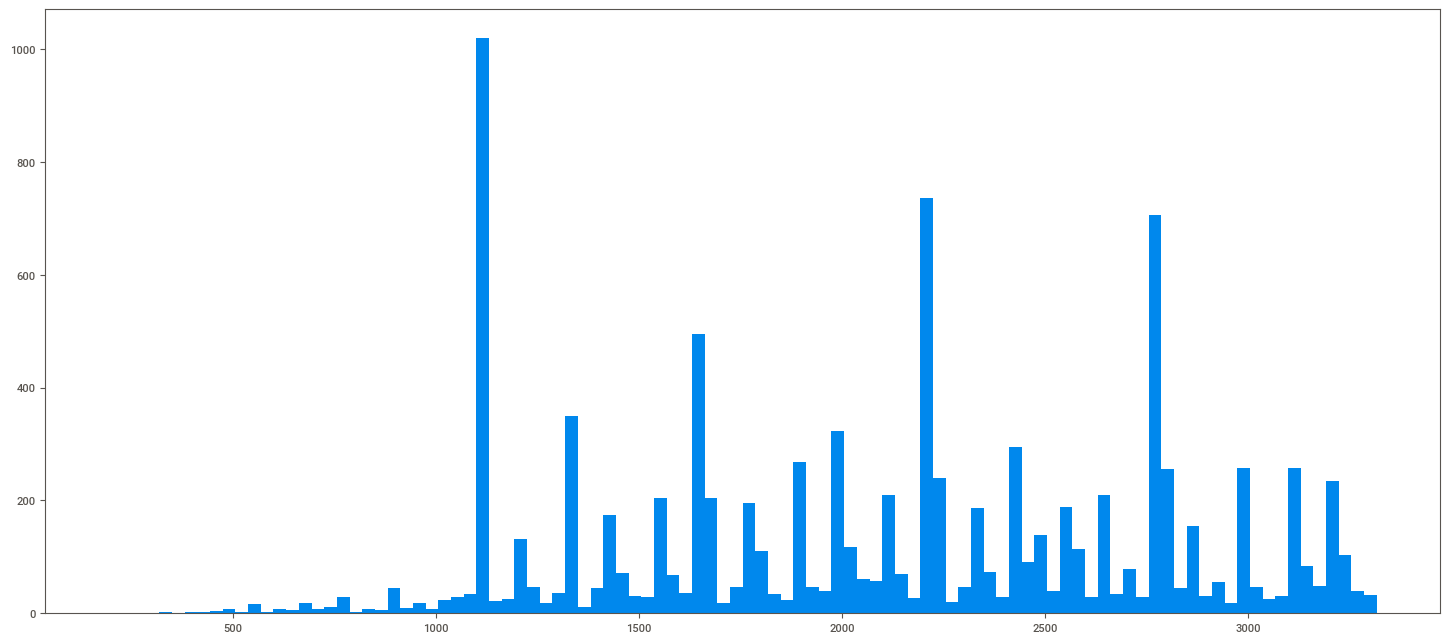

In [21]:
plt.figure(figsize=(18,8))
plt.hist(train_df[train_df["Price"]<train_df["Price"].mode()[0]]["Price"], bins=100)
plt.ticklabel_format(style='plain',axis="x")
plt.show()

1000円以下の格安施設

シェアハウスとか

In [22]:
train_df.query("Price<=500")

,ID,OwnerID,OwnerSince,TimeToReply,ReplyRate,AcceptanceRate,IdentityVerified,Verifications,ListingsCount,HasPicture,OwnerDetail,Description,PropertyType,RoomType,MaximumAccommodates,InstantBookable,BathroomsText,Beds,Amenities,Bedrooms,AreaCategory,Latitude,Longitude,Availability,Vacancy30,Vacancy60,Vacancy90,Vacancy365,UserRatingOverall,UserRatingInformation,UserRatingCleanliness,UserRatingCheckin,UserRatingCommunication,UserRatingLocation,UserRatingPrice,NumberOfReviews,NumberOfReviews1m,NumberOfReviews1y,FirstReview,LastReview,ReviewsPerMonth,Price
258,258,131,2019-01-17,NaN,NaN,NaN,t,"[""email"", ""phone"", ""offline_government_id"", ""g...",1.0,t,NaN,El dpto está ubicado en el barrio de Montserra...,Shared room in rental unit,Shared room,1,f,1 shared bath,1.0,"[""Kitchen"", ""Essentials"", ""Elevator"", ""Wifi"", ...",1.0,Monserrat,-34.61,-58.38,t,30,60,90,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,449
1428,1428,31065,2019-03-25,NaN,NaN,NaN,f,"[""email"", ""phone""]",1.0,t,soy muy tranquila y me gusta la tranquilidad,la pieza es comoda con tele la cama es muy com...,Private room in residential home,Private room,1,f,1 shared bath,1.0,"[""Heating"", ""Cable TV"", ""Dedicated workspace"",...",1.0,Villa Santa Rita,-34.62,-58.48,t,28,58,88,363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,497
3337,3337,29529,2014-01-05,NaN,NaN,NaN,t,"[""email"", ""phone"", ""reviews"", ""manual_offline""...",1.0,t,Apasionado por Buenos Aires y su increible ofe...,"LOFT (50m²) ubicado en PLENO CENTRO PORTEÑO, e...",Entire loft,Entire home/apt,2,f,1 bath,0.0,"[""Heating"", ""Dryer"", ""Kitchen"", ""Shampoo"", ""Lo...",1.0,Monserrat,-34.61,-58.38,t,0,0,0,67,5.00,5.00,4.50,5.00,5.00,5.00,5.00,2,0,0,2014-11-01,2014-08-21,0.02,292
5046,5046,44835,2017-08-01,a few days or more,0%,0%,t,"[""email"", ""phone"", ""jumio"", ""offline_governmen...",1.0,t,NaN,"Habitación en el barrio de Almagro, a 2 cuadra...",Private room in rental unit,Private room,1,f,1 shared bath,1.0,"[""Heating"", ""Lock on bedroom door"", ""Fire exti...",1.0,Almagro,-34.61,-58.42,t,29,59,89,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,403
5532,5532,25597,2013-05-08,within a day,75%,0%,f,"[""email"", ""phone"", ""facebook"", ""offline_govern...",1.0,t,Me gusta mucho viajar y cuando recibo a alguie...,NaN,Private room in rental unit,Private room,1,t,1 shared bath,1.0,"[""Free street parking"", ""Heating"", ""Bed linens...",1.0,Villa Urquiza,-34.57,-58.47,t,0,0,0,232,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,0,0,2019-03-24,2019-03-24,0.03,393
5652,5652,21012,2017-02-11,a few days or more,0%,NaN,f,"[""email"", ""phone""]",3.0,t,NaN,A unique hostel has arrived in the trendiest n...,Room in hostel,Hotel room,1,t,4 baths,1.0,"[""Iron"", ""First aid kit"", ""Paid parking on pre...",1.0,Palermo,-34.59,-58.44,t,0,0,0,50,5.00,5.00,5.00,5.00,5.00,5.00,5.00,3,0,0,2018-03-10,2018-07-23,0.07,419
8039,8039,9452,2018-01-01,a few days or more,0%,33%,f,"[""email"", ""phone"", ""reviews""]",2.0,t,Soy joven y entusiasta. Doy clases de entrenam...,Habitación amplia. Buena iluminación natural. ...,Private room in rental unit,Private room,1,f,1 shared bath,1.0,"[""Iron"", ""Lock on bedroom door"", ""Dedicated wo...",1.0,Constitucion,-34.62,-58.39,t,0,0,0,0,4.66,4.66,4.34,4.75,4.81,4.69,4.53,33,0,0,2018-01-06,2018-12-24,0.73,244
8940,8940,25232,2018-06-17,NaN,NaN,100%,f,"[""email"", ""phone""]",3.0,t,NaN,NaN,Shared room in rental unit,Shared room,1,t,1 shared bath,2.0,"[""Heating"", ""Dryer"", ""Dedicated workspace"", ""K...",1.0,San Nicolas,-34.60,-58.38,t,0,27,57,332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,335
8993,8993,43255,2017-02-08,within a day,100%,NaN,f,"[""email"", ""phone"", ""facebook""]",1.0,t,NaN,Monoambiente luminoso con cocina separada y ba...,Shared room in rental unit,Shared room,1,t,1 shared bath,1.0,"[""Heating"", ""Kitchen"", ""Shampoo"", ""Long term s...",1.0,Almagro,-34.61,-58.42,t,29,59,89,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,458
10842,10842,1429,2017-12-17,Na

外れ値削除（今後の図示で邪魔なため）

In [23]:
train_df = train_df[train_df["Price"] <= 2000000].reset_index(drop=True)

# OwnerID

オーナーのid

・訓練データとテストデータで被っているのは３分の１くらい

訓練データとテストデータで被っているOwnerID

In [24]:
%%time
owner_id_counts = test_df[test_df["OwnerID"].apply(lambda x: x in set(train_df["OwnerID"]))]["OwnerID"].value_counts()

CPU times: user 3min 33s, sys: 2.59 s, total: 3min 36s
Wall time: 3min 44s


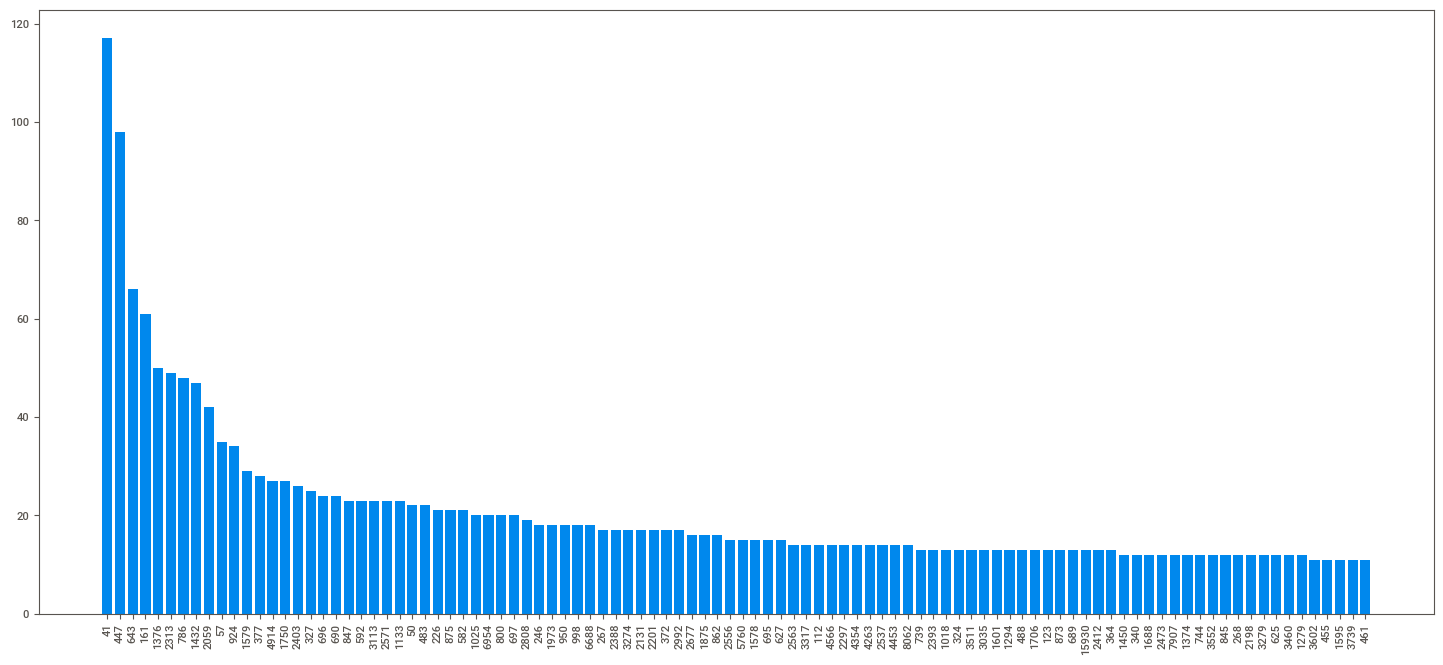

In [25]:
plt.figure(figsize=(18,8))
plt.bar(owner_id_counts[:100].index.astype("str"), owner_id_counts[:100].values)
plt.tick_params(axis="x", labelrotation=90)

In [26]:
# テストデータのうちtrainデータにあるOwnerIDの個数
num = test_df[test_df["OwnerID"].apply(lambda x: x in set(train_df["OwnerID"]))].shape[0]
print(num)
print(num / (test_df.shape[0]))

7838
0.258799445288252


OwnerIDごとのPriceのばらつき

# OwnerSince
オーナーが民泊サービスに登録された日付



*   連結して数値に変換
*   年、月を抽出


In [27]:
# 日付の文字列を数値に変換する関数
def transform_date(df, column):
    df[column] = df[column].str.replace("-", "").apply(float)
    return df

In [28]:
# train_df["OwnerSince"] = train_df["OwnerSince"].str.replace("-", "").apply(float)
# test_df["OwnerSince"] = test_df["OwnerSince"].str.replace("-", "").apply(float)
train_df = transform_date(train_df, "OwnerSince")
test_df = transform_date(test_df, "OwnerSince")

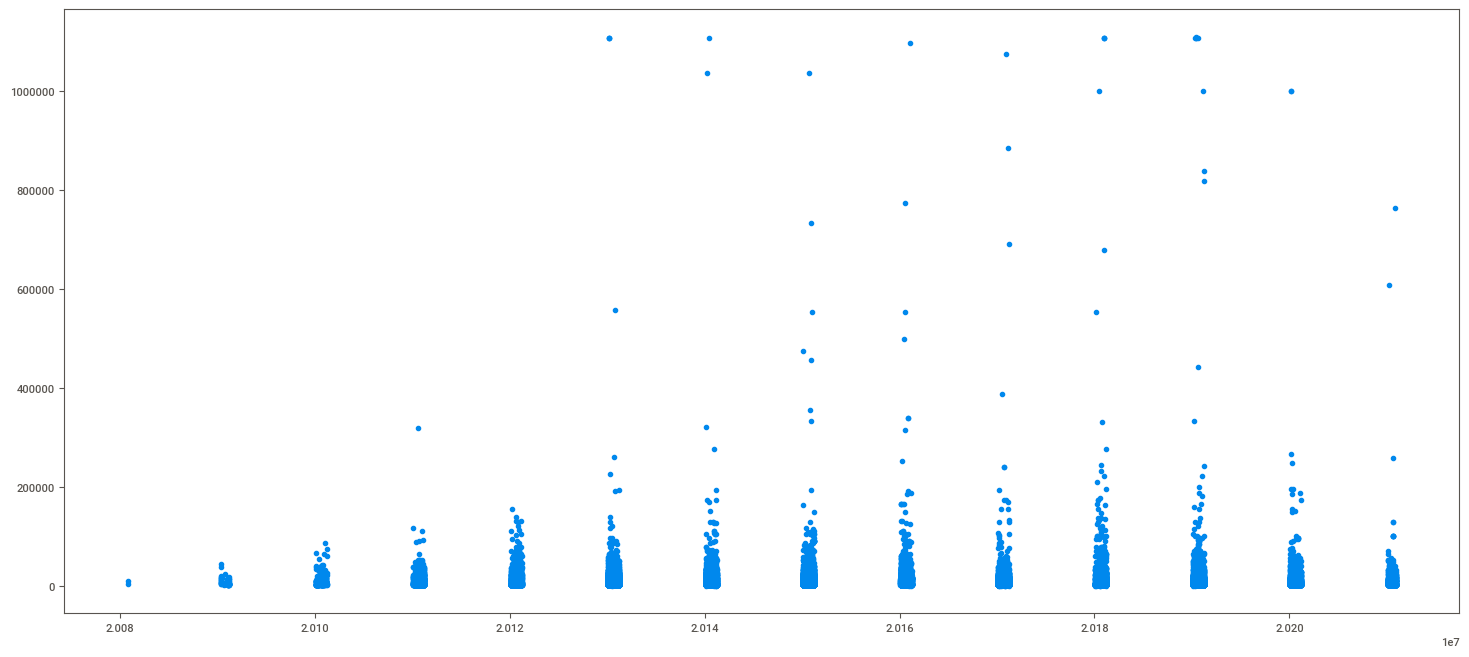

In [29]:
plt.figure(figsize=(18,8))
plt.scatter(train_df["OwnerSince"], train_df["Price"])
plt.ticklabel_format(style='plain',axis="y")

# TimeToReply
オーナーの返信までの平均時間

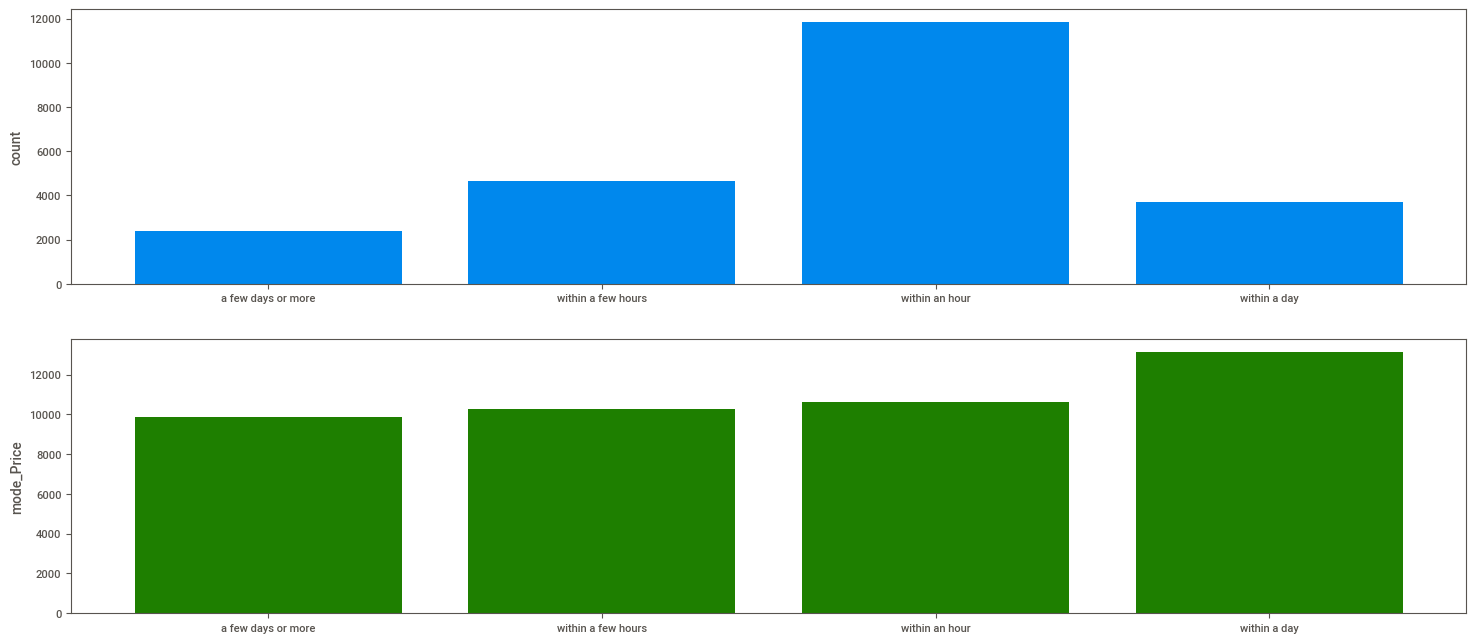

In [30]:
kind_pivot = train_df.pivot_table(index="TimeToReply", values="Price", aggfunc=["mean","count"]).sort_values(('mean', 'Price'))
# ..,margins=True, margins_name="total") # 総計を追加
# categoryは.sort_values(('mean', 'state'))して並び替えて使用する、数値は並び替えない)

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(18, 8))
axes.ravel()[0].bar(kind_pivot.index, kind_pivot[("count","Price")]) 
axes.ravel()[0].set_ylabel("count")
# axes.ravel()[0].tick_params(axis="x", labelrotation=90)
axes.ravel()[1].bar(kind_pivot.index, kind_pivot[("mean","Price")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("mode_Price")
#axes.ravel()[1].tick_params(axis="x", labelrotation=90)
plt.show()

# ReplyRate	
オーナーの返信率

・数値データに変換、100％か否か(フラグ)

In [31]:
train = train_df.copy()
train["ReplyRate"] = train["ReplyRate"].str.replace("%", "").apply(float)

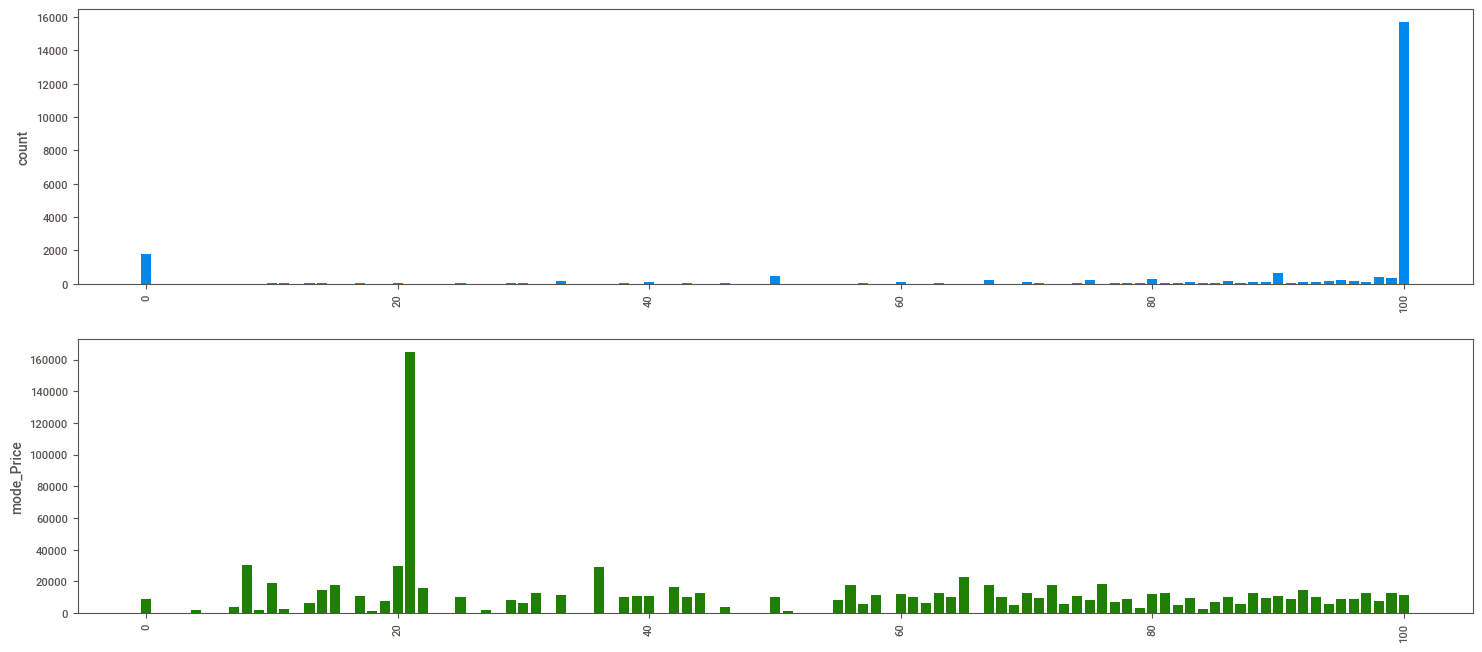

In [32]:
kind_pivot = train.pivot_table(index="ReplyRate", values="Price", aggfunc=["mean","count"])
# ..,margins=True, margins_name="total") # 総計を追加
# categoryは.sort_values(('mean', 'state'))して並び替えて使用する、数値は並び替えない)

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(18, 8))
axes.ravel()[0].bar(kind_pivot.index, kind_pivot[("count","Price")]) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[0].tick_params(axis="x", labelrotation=90)
axes.ravel()[1].bar(kind_pivot.index, kind_pivot[("mean","Price")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("mode_Price")
axes.ravel()[1].tick_params(axis="x", labelrotation=90)
plt.show()

# AcceptanceRate
オーナーの予約要求の認証率（※１ この民泊サービスには利用者がオーナーに予約をリクエストし、オーナーがそれを認証することで予約が確定される物件が存在します。）

・数値に変換、100％か否か(フラグ)

In [33]:
train = train_df.copy()
train["AcceptanceRate"] = train["AcceptanceRate"].str.replace("%", "").apply(float)

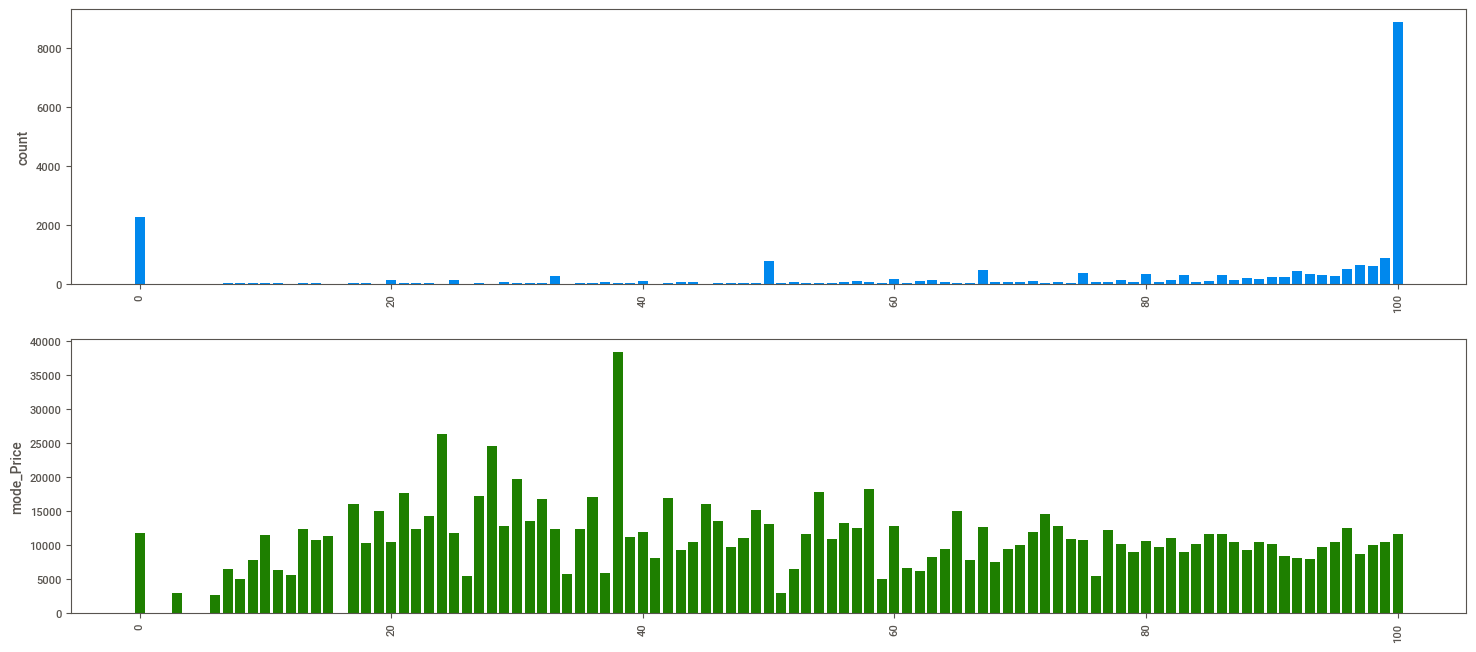

In [34]:
kind_pivot = train.pivot_table(index="AcceptanceRate", values="Price", aggfunc=["mean","count"])
# ..,margins=True, margins_name="total") # 総計を追加
# categoryは.sort_values(('mean', 'state'))して並び替えて使用する、数値は並び替えない)

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(18, 8))
axes.ravel()[0].bar(kind_pivot.index, kind_pivot[("count","Price")]) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[0].tick_params(axis="x", labelrotation=90)
axes.ravel()[1].bar(kind_pivot.index, kind_pivot[("mean","Price")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("mode_Price")
axes.ravel()[1].tick_params(axis="x", labelrotation=90)
plt.show()

# IdentityVerified
オーナーが認証されているかどうか

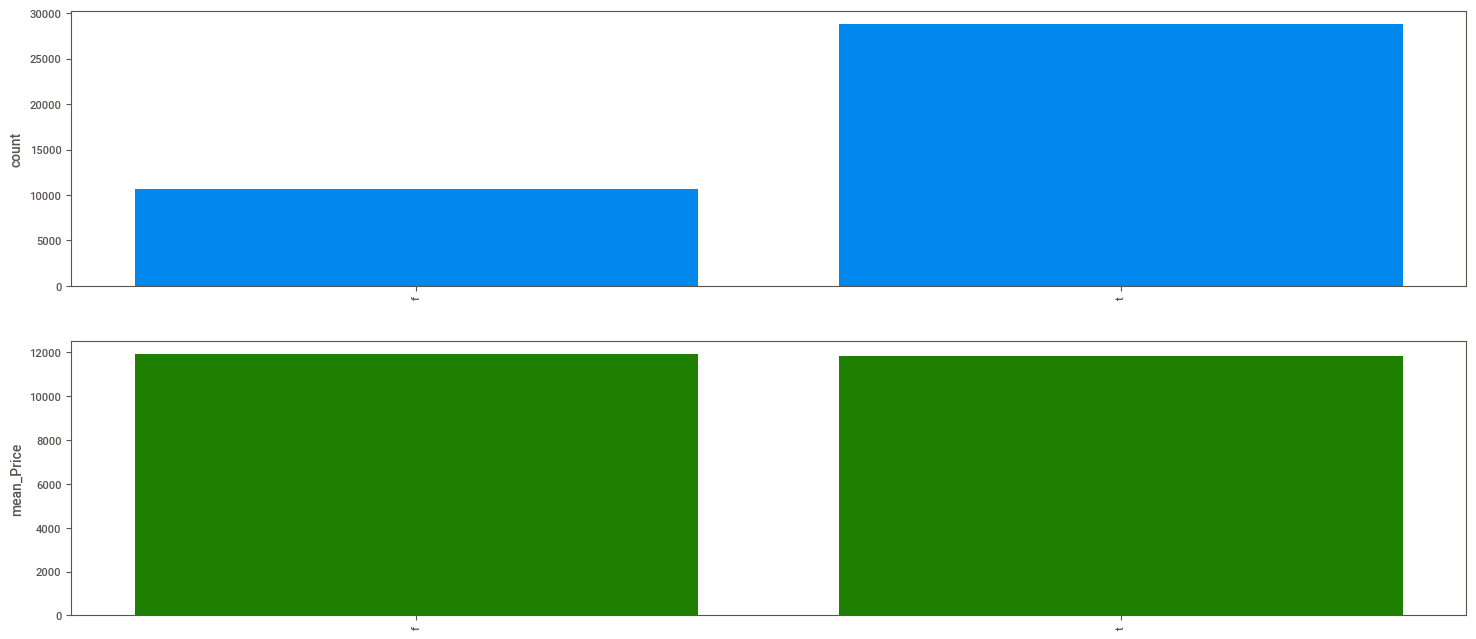

In [35]:
kind_pivot = train.pivot_table(index="IdentityVerified", values="Price", aggfunc=["mean","count"])
# ..,margins=True, margins_name="total") # 総計を追加
# categoryは.sort_values(('mean', 'state'))して並び替えて使用する、数値は並び替えない)

# 横向きはbarh
fig, axes = plt.subplots(2, 1, figsize=(18, 8))
axes.ravel()[0].bar(kind_pivot.index, kind_pivot[("count","Price")]) 
axes.ravel()[0].set_ylabel("count")
axes.ravel()[0].tick_params(axis="x", labelrotation=90)
axes.ravel()[1].bar(kind_pivot.index, kind_pivot[("mean","Price")], color="#1E7F00") #(分ける要素, 高さ)
axes.ravel()[1].set_ylabel("mean_Price")
axes.ravel()[1].tick_params(axis="x", labelrotation=90)
plt.show()

# Verifications
オーナーが認証に何を使っているか




・媒体別にダミー変数化

・対応媒体数個数も特徴量にする

In [36]:
# 使われている媒体を取り出し
sets = set()
for i in range(len(train_df)):
    sets = sets.union(set(train_df["Verifications"][i].replace("[", "").replace('"', "").replace(']', "").replace(" ", "").split(",")))

In [37]:
sets

{'',
 'None',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'manual_offline',
 'manual_online',
 'offline_government_id',
 'phone',
 'photographer',
 'reviews',
 'selfie',
 'sent_id',
 'sesame',
 'sesame_offline',
 'weibo',
 'work_email',
 'zhima_selfie'}

# ListingCount



オーナーが民泊サービスに登録している物件数

In [ ]:
train_df[train_df["ListingCount"]>1000]

# HasPicture	
オーナーが写真を載せているか

# OwnerDetail	
オーナーの紹介文

・訓練データとテストデータで言語（地域）に偏りがある。テストデータは英語が多い→普通のBertの方がスコアが高い可能性あり

・言語判定が重要な変数となる場合→精度の高い言語判定モデルやUnknownの判定も取り入れる

・トークン数が512を超えるデータがテストデータに多い→Longformerなどの手法を試す

## 言語判定

https://github.com/google/cld3

In [96]:
!pip install pycld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.6 MB 4.9 MB/s 


In [ ]:
!pip install git+https://github.com/alainrouillon/py-googletrans@feature/enhance-use-of-direct-api

In [97]:
import cld3 

In [98]:
# 言語判定してdfに追加する関数
def add_lang_cld3(df, column):
    lang_lists = []
    for i in range(len(df)):
        if (df[column][i] is np.nan):
            lang_lists.append(np.nan)
        else:
            lang = cld3.get_language(df[column][i])[0]
            # probabilityが0.9を下回る場合はUnknownとする
            # if (cld3.get_language(df["OwnerDetail"][i])[1]<0.8):
            #     lang = "un"
            lang_lists.append(lang)
            
    df["{}_lang".format(column)] = lang_lists

    return df

In [ ]:
from googletrans import Translator

In [88]:
def add_lang_by_googletr(df, col):
    lang_list = []
    confidence_list = []

    df["{}_lang_tuple".format(col)] = df[col].apply(lambda x: x if (x is np.nan) else detect_lang(x))
    df["{}_lang".format(col)] = df["{}_lang_tuple".format(col)].apply(lambda x: x if (x is np.nan) else x[0])
    df["{}_lang_confidence".format(col)] = df["{}_lang_tuple".format(col)].apply(lambda x: x if (x is np.nan) else x[1])

    # for i in range(len(df)):
    #     print(i)
    #     src = df[col][i] 
    #     # NaNの場合
    #     if (src is np.nan):
    #         lang_list.append(np.nan)
    #         confidence_list.append(np.nan)
    #     else:
    #         # 言語判定
    #         lang, confidence = detect_lang(src)
    #         lang_list.append(lang)
    #         confidence_list.append(confidence)
    # # 特徴量に追加
    # df["{}_lang".format(col)] = lang_list
    # df["{}_lang_confidence".format(col)] = confidence_list

    #　候補が複数ある場合はリストとなる
    df["{}_lang".format(col)] = df["{}_lang".format(col)].apply(lambda x: x[0] if (type(x)==list) else x)
    df["{}_lang_confidence".format(col)] = df["{}_lang_confidence".format(col)].apply(lambda x: x[0] if (type(x)==list) else x)

    return df

def detect_lang(src):
    """
    言語と信頼度をreturn
    """
    tr = Translator(service_urls=['translate.googleapis.com'])
    # うまくいくまで繰り返す
    while True:
        try:
            # text = tr.translate(src, dest="en").text
            detect = tr.detect(src)
            break
        except Exception as e:
            print("faild")
            tr = Translator(service_urls=['translate.googleapis.com'])

    return detect.lang, detect.confidence

In [37]:
%%time
"""言語判定"""
# train_df = add_lang_cld3(train_df, "OwnerDetail")
# test_df = add_lang_cld3(test_df, "OwnerDetail")

train_df = add_lang_by_googletr(train_df, "OwnerDetail")
test_df = add_lang_by_googletr(test_df, "OwnerDetail")

言語の偏りを図示

<BarContainer object of 36 artists>

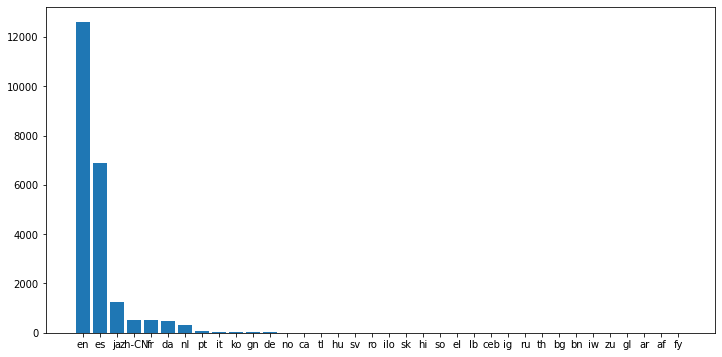

In [60]:
plt.figure(figsize=(12,6))
plt.bar(x=train_df["OwnerDetail_lang"].value_counts().index,
        height=train_df["OwnerDetail_lang"].value_counts().values)

<BarContainer object of 36 artists>

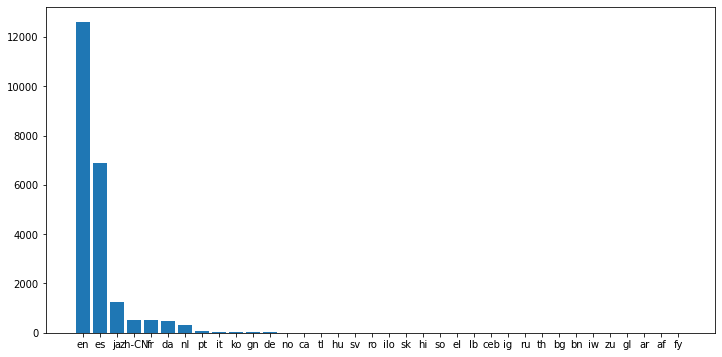

In [62]:
plt.figure(figsize=(12,6))
plt.bar(x=train_df["OwnerDetail_lang"].value_counts().index, 
        height=train_df["OwnerDetail_lang"].value_counts().values)

<BarContainer object of 83 artists>

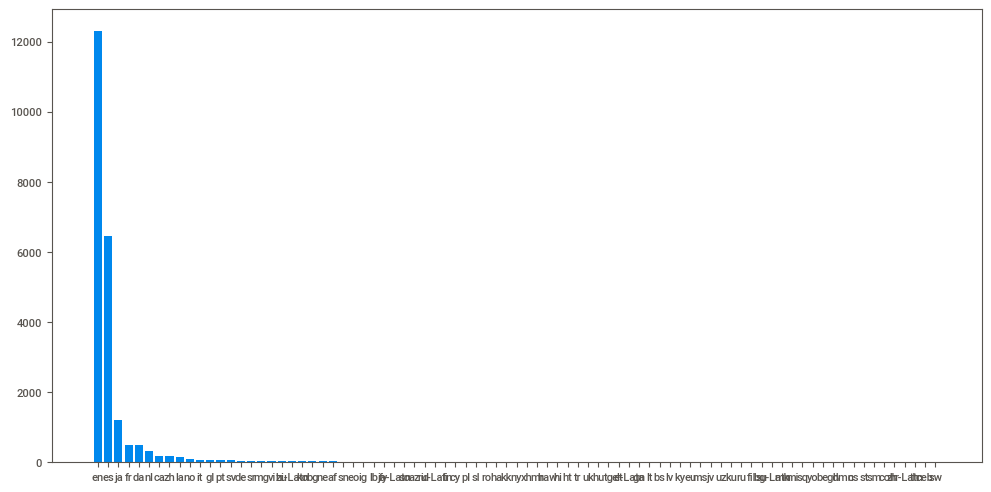

In [42]:
plt.figure(figsize=(12,6))
plt.bar(x=train_df["OwnerDetail_lang"].value_counts().index, 
        height=train_df["OwnerDetail_lang"].value_counts().values)

<BarContainer object of 80 artists>

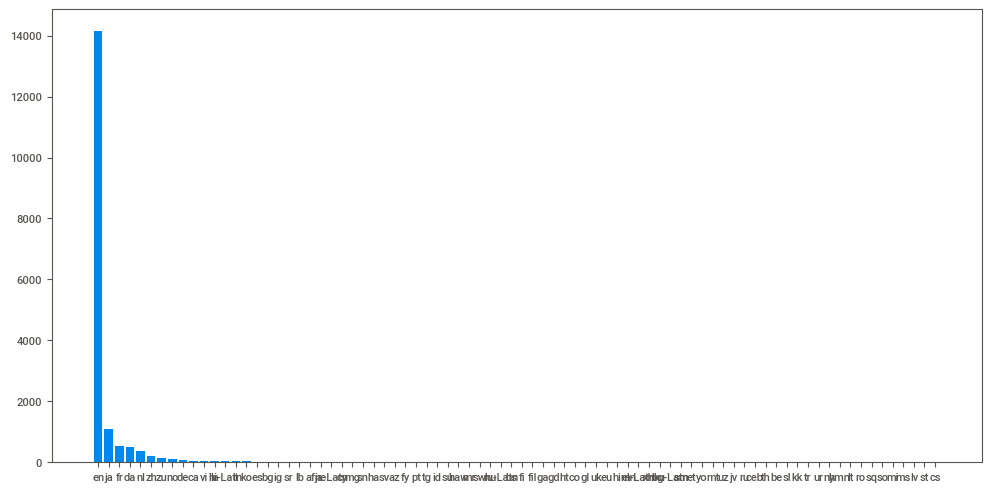

In [43]:
plt.figure(figsize=(12,6))
plt.bar(x=test_df["OwnerDetail_lang"].value_counts().index, 
        height=test_df["OwnerDetail_lang"].value_counts().values)

## トークン数

In [44]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.5 MB/s 
     |████████████████████████████████| 7.6 MB 60.7 MB/s 
     |████████████████████████████████| 182 kB 43.7 MB/s 


In [45]:
from transformers import AutoTokenizer

tokenize = AutoTokenizer.from_pretrained('xlm-roberta-base')

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [46]:
import statistics
def print_plot_token_num(df, column, bins):
    # 欠損地を置換
    df = df.replace({column: {np.nan: "NAN"}})

    # トークン数のリストを作成
    train_data = df[column]
    token_nums = []
    for i in range(len(train_data)):
    #     if (train_data[i] is np.nan):
    #         train_data[i] = np.nan
    #     else:
        # 分かち書き
        token = tokenize.encode(train_data[i])
        # トークン数を格納
        token_nums.append(len(token))

    # トークン数が512以上のレコード数
    print("-------------------------------------------------------------------------------")
    print("50%点、75％点、95%点、最大値: ", np.percentile(token_nums, q=[50, 75, 95, 100]))
    print("Number of out of 512: ", sum([x > 512 for x in token_nums ]), "({}%)".format(100*sum([x > 512 for x in token_nums ])/len(token_nums)))
    print("Number of out of 1024: ", sum([x > 1024 for x in token_nums ]), "({}%)".format(100*sum([x > 1024 for x in token_nums ])/len(token_nums)))

    # トークン数のヒストグラム
    plt.figure(figsize=(18,6))
    plt.hist(token_nums, bins=bins)
    plt.show()

Token indices sequence length is longer than the specified maximum sequence length for this model (1093 > 512). Running this sequence through the model will result in indexing errors


-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [  17.   71.  212. 2785.]
Number of out of 512:  169 (0.42814075443974364%)
Number of out of 1024:  20 (0.05066754490411167%)


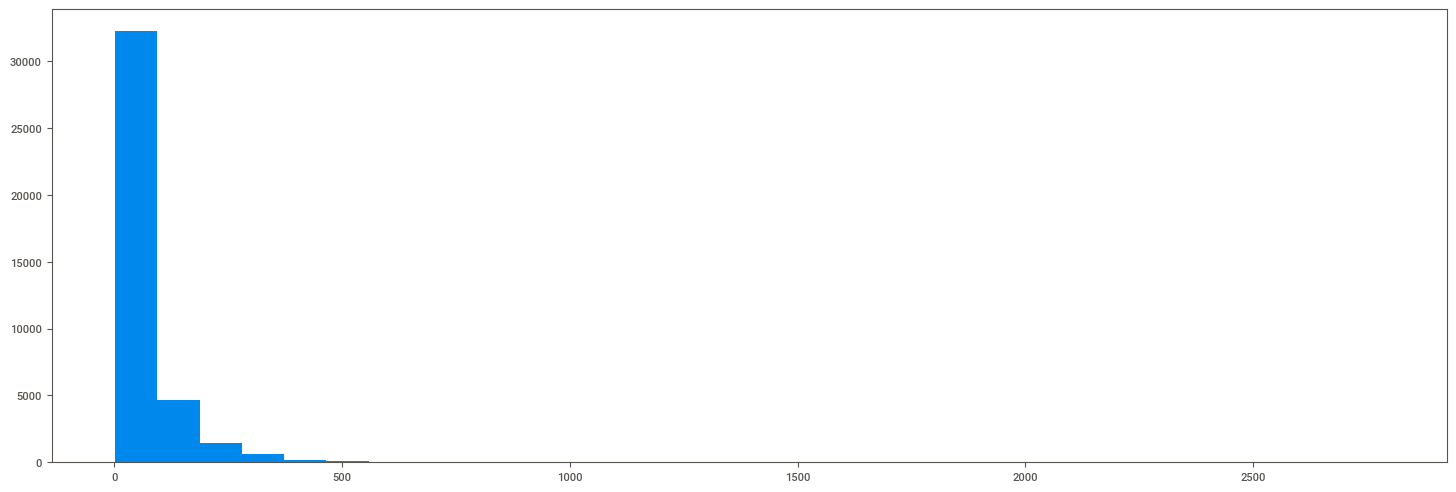

In [47]:
print_plot_token_num(train_df, "OwnerDetail", 30)

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [  18.   76.  218. 2785.]
Number of out of 512:  161 (0.5315987585022783%)
Number of out of 1024:  13 (0.042924123357326815%)


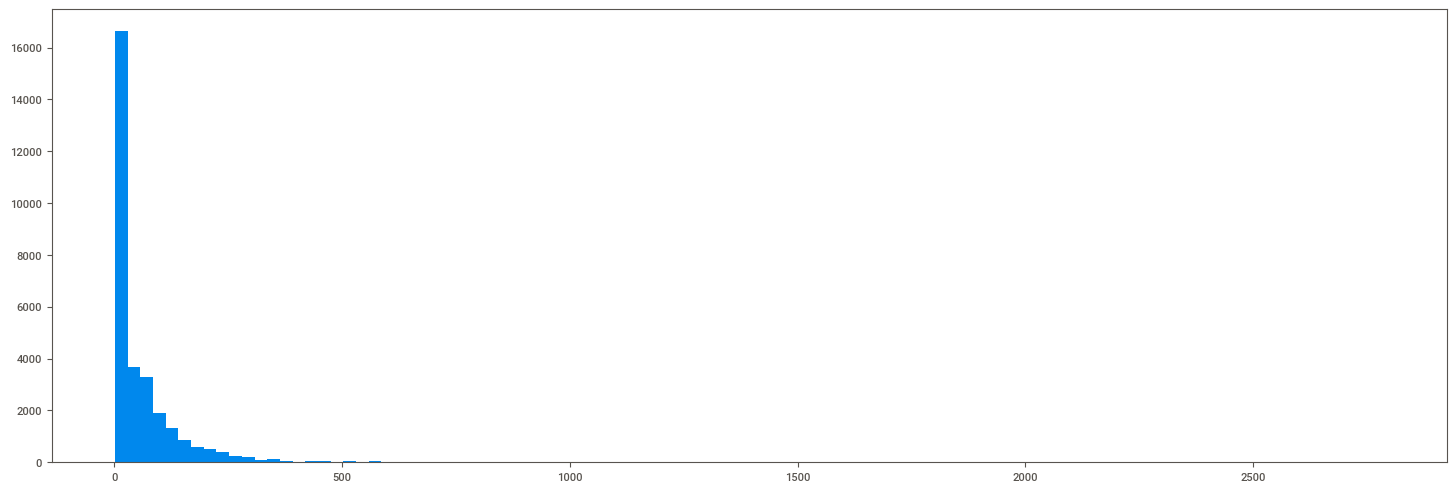

In [48]:
print_plot_token_num(test_df, "OwnerDetail", 100)

## 文字検索

In [49]:
word = "simple"
train_df["is_text_OwnerDetail"] = train_df["OwnerDetail"].apply(lambda x: False if (x is np.nan) else word in x.lower())
train_df["is_text_Description"] = train_df["Description"].apply(lambda x: False if (x is np.nan) else word in x.lower())
train_df[train_df["is_text_OwnerDetail"] | train_df["is_text_Description"]]

,ID,OwnerID,OwnerSince,TimeToReply,ReplyRate,AcceptanceRate,IdentityVerified,Verifications,ListingsCount,HasPicture,OwnerDetail,Description,PropertyType,RoomType,MaximumAccommodates,InstantBookable,BathroomsText,Beds,Amenities,Bedrooms,AreaCategory,Latitude,Longitude,Availability,Vacancy30,Vacancy60,Vacancy90,Vacancy365,UserRatingOverall,UserRatingInformation,UserRatingCleanliness,UserRatingCheckin,UserRatingCommunication,UserRatingLocation,UserRatingPrice,NumberOfReviews,NumberOfReviews1m,NumberOfReviews1y,FirstReview,LastReview,ReviewsPerMonth,Price,OwnerDetail_lang,is_text_OwnerDetail,is_text_Description
18,18,3426,20150605.0,within an hour,100%,100%,f,"[""email"", ""phone"", ""reviews"", ""jumio"", ""govern...",14.0,t,"Easy going, it would be a pleassure that you s...",Contemporary Studio (33 sqm) located in the be...,Entire rental unit,Entire home/apt,2,f,1 bath,1.0,"[""Dedicated workspace"", ""Hangers"", ""Luggage dr...",NaN,Palermo,-34.59,-58.42,t,30,60,90,365,4.79,4.90,4.79,4.90,4.97,4.77,4.64,71,0,0,2015-08-04,2019-07-08,0.95,3877,en,False,True
26,26,41433,20131002.0,NaN,NaN,NaN,t,"[""email"", ""phone"", ""reviews"", ""jumio"", ""govern...",0.0,t,"Hola, a todos, me llamo Facundo, soy soltero, ...",Departamento ubicado a 2 cuadras del Subterrán...,Entire rental unit,Entire home/apt,2,f,1 bath,1.0,"[""Coffee maker"", ""Free street parking"", ""Heati...",NaN,Palermo,-34.57,-58.44,t,8,8,8,220,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2,0,0,2018-08-23,2018-09-17,0.05,3323,es,True,False
69,69,10243,20190705.0,NaN,NaN,NaN,f,"[""email"", ""phone""]",2.0,t,"Soy porteño, arquitecto, 35 años. He vivido en...",Una hermosa y grande casa con 11 rooms destina...,Private room in residential home,Private room,1,t,4.5 shared baths,1.0,"[""BBQ grill"", ""Bed linens"", ""Dedicated workspa...",1.0,Balvanera,-34.60,-58.40,t,28,58,88,363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,1107,es,False,True
80,80,4974,20181021.0,NaN,NaN,NaN,f,"[""phone""]",26.0,t,NaN,Departamento de 2 habitaciones con capacidad p...,Entire rental unit,Entire home/apt,6,f,1 bath,4.0,"[""Heating"", ""Bed linens"", ""Kitchen"", ""Air cond...",2.0,Palermo,-34.59,-58.42,t,28,58,88,363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,3101,NaN,False,True
208,208,2639,20160121.0,within a few hours,100%,97%,t,"[""email"", ""phone"", ""reviews"", ""jumio"", ""offlin...",81.0,t,NaN,Monoambiente amoblado para alquiler temporario...,Entire rental unit,Entire home/apt,3,f,1 bath,2.0,"[""Mini fridge"", ""Free street parking"", ""Heatin...",NaN,Palermo,-34.59,-58.41,t,30,60,90,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,9193,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39221,39223,18316,20150728.0,NaN,NaN,NaN,t,"[""email"", ""phone"", ""facebook"", ""google"", ""revi...",1.0,t,I'm a 27 year old girl who is currently workin...,"Nice, newly renovated apartment in the great n...",Entire rental unit,Entire home/apt,2,f,1 bath,1.0,"[""Paid valet parking on premises"", ""Drying rac...",1.0,Frederiksberg,55.69,12.53,t,0,0,0,0,4.83,5.00,4.67,5.00,5.00,4.60,4.60,6,0,0,2016-05-08,2019-07-22,0.09,12144,en,False,True
39257,39259,19321,20130310.0,within a few hours,100%,100%,t,"[""email"", ""phone"", ""reviews"", ""jumio"", ""govern...",1.0,t,I am Italian and now currently living and stud...,My place is close to Frederiksberg and S-train...,Private room in rental unit,Private room,2,f,1 shared bath,1.0,"[""Cooking basics"", ""Washer"", ""Shampoo"", ""Heati...",1.0,Valby,55.67,12.49,t,0,0,0,0,4.75,4.86,4.76,4.90,4.87,4.42,4.67,84,2,4,2017-05-22,2019-06-27,1.58,4771,en,False,True
39280,39282,43484,20160522.0,NaN,NaN,NaN,t,"[""email"", ""phone"", ""google"", ""reviews"", ""jumio""]",1.0,t,My name is Janna. I am both a yoga teacher and...,A lovely bright cozy design home located in th...,Entire rental unit,Entire home/apt,2,f,1 bath,1.0,"[""Hot wat

# Description	
物件の説明文

*   OwnerDetailと言語判定の乖離あり
*   トークン数かなり多い

## 言語判定

In [101]:
train_df.query("Description_lang != 'en'")

,ID,OwnerID,OwnerSince,TimeToReply,ReplyRate,AcceptanceRate,IdentityVerified,Verifications,ListingsCount,HasPicture,OwnerDetail,Description,PropertyType,RoomType,MaximumAccommodates,InstantBookable,BathroomsText,Beds,Amenities,Bedrooms,AreaCategory,Latitude,Longitude,Availability,Vacancy30,Vacancy60,Vacancy90,Vacancy365,UserRatingOverall,UserRatingInformation,UserRatingCleanliness,UserRatingCheckin,UserRatingCommunication,UserRatingLocation,UserRatingPrice,NumberOfReviews,NumberOfReviews1m,NumberOfReviews1y,FirstReview,LastReview,ReviewsPerMonth,Price,OwnerDetail_lang,OwnerDetail_lang_confidence,Description_lang
0,0,15560,2020-03-15,a few days or more,0%,NaN,f,"[""phone""]",0.0,t,NaN,DUEÑO DIRECTO ALQUILA HABITACIONES INDIVIDUALE...,Private room in residential home,Private room,4,t,2 shared baths,4.0,"[""Iron"", ""First aid kit"", ""Lock on bedroom doo...",4.0,Almagro,-34.62,-58.41,t,30,60,89,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,898,NaN,NaN,es
1,1,18859,2021-02-05,NaN,NaN,NaN,t,"[""phone"", ""identity_manual""]",1.0,t,NaN,Departamento Ubicado en plena zona de Palermo ...,Entire rental unit,Entire home/apt,4,t,2.5 baths,4.0,"[""Iron"", ""Heating"", ""Kitchen"", ""Fire extinguis...",2.0,Palermo,-34.58,-58.42,t,30,60,90,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,609213,NaN,NaN,es
6,6,13628,2014-09-03,NaN,NaN,NaN,t,"[""email"", ""phone"", ""offline_government_id"", ""g...",6.0,t,Me encanta recibir huéspedes que disfruten de ...,EXELENTE CON BALCON A LA CALLE LUMINOSO (cue...,Entire rental unit,Entire home/apt,2,t,1 bath,1.0,"[""Heating"", ""Bed linens"", ""Kitchen"", ""Air cond...",NaN,Recoleta,-34.59,-58.41,t,11,41,71,136,4.85,4.91,4.76,4.94,4.95,4.98,4.71,66,0,31,2018-10-13,2021-01-08,1.83,2057,es,1.0,es
7,7,28848,2017-08-22,within an hour,100%,91%,f,"[""phone""]",0.0,t,NaN,Agréable studio/duplex neuf et lumineux dans u...,Entire rental unit,Entire home/apt,2,t,1 bath,1.0,"[""Washer"", ""Dishes and silverware"", ""Hangers"",...",1.0,Woluwe-Saint-Lambert,50.85,4.41,t,0,0,0,66,4.88,5.00,4.75,4.88,5.00,4.75,4.63,8,4,8,2021-02-01,2021-09-16,1.02,7521,NaN,NaN,fr
8,8,32003,2017-10-09,a few days or more,0%,NaN,t,"[""email"", ""phone"", ""facebook"", ""reviews"", ""jum...",1.0,t,NaN,Esta equipado para dos personas con una cálida...,Entire rental unit,Entire home/apt,2,f,1 bath,1.0,"[""Bed linens"", ""Hangers"", ""Ethernet connection...",NaN,San Nicolas,-34.60,-58.38,t,28,58,88,178,5.00,5.00,5.00,5.00,5.00,5.00,4.00,1,0,0,2019-10-09,2019-10-09,0.04,1685,NaN,NaN,es
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39456,39456,1408,2016-03-06,NaN,NaN,NaN,t,"[""email"", ""phone"", ""reviews"", ""jumio"", ""govern...",2.0,t,NaN,NaN,Private room in rental unit,Private room,2,f,1 shared bath,1.0,"[""Hot water"", ""Shampoo"", ""Washer"", ""TV"", ""Esse...",1.0,Centrum-Oost,52.37,4.90,t,0,0,0,0,4.67,4.67,4.11,4.89,5.00,5.00,4.00,10,0,0,2019-08-22,2019-06-30,0.40,12968,NaN,NaN,NaN
39458,39458,12414,2016-11-02,NaN,NaN,50%,t,"[""email"", ""phone"", ""facebook"", ""google"", ""revi...",0.0,t,東京駅の近くで､不動産会社を経営しています｡鎌倉でも簡易宿所を経営しています｡太陽光発電所...,1部屋まるまる貸切です。<br />この時期、自分たちだけの空間で、安全にゆっくりしたい方に...,Entire rental unit,Entire home/apt,8,t,1 bath,3.0,"[""Smoke alarm"", ""TV"", ""Long term stays allowed...",3.0,Taito Ku,35.71,139.80,t,0,0,0,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,16000,ja,1.0,ja
39466,39466,25483,2016-04-18,NaN,NaN,67%,t,"[""email"", ""phone"", ""reviews"", ""offline_governm...",1.0,t,NaN,"Situé le long des étangs d' Ixelles, à 5 minut...",Entire rental unit,Entire home/apt,3,f,1 bath,2.0,"[""Elevator"", ""Microwave"", ""Backyard"", ""Dishes ...",NaN,Ixelles,50.82,4.38,t,0,0,0,235,4.75,4.90,4.86,4.94,4.94,4.96,4.66,80,0,1,2016-09-04,2019-12-27,1.30,10244,NaN,NaN,fr
39471,39471,4635,2018-01-10,within an hour,100%,100%,t,"[""email"", ""phone""]",9.0,t,NaN,studio dans un apart hôtel<br /><b

In [99]:
train_df = add_lang_cld3(train_df, "Description")
# test_df = add_lang_cld3(test_df, "Description")

# train_df = add_lang_by_googletr(train_df, "Description")
# test_df = add_lang_by_googletr(test_df, "Description")

<BarContainer object of 52 artists>

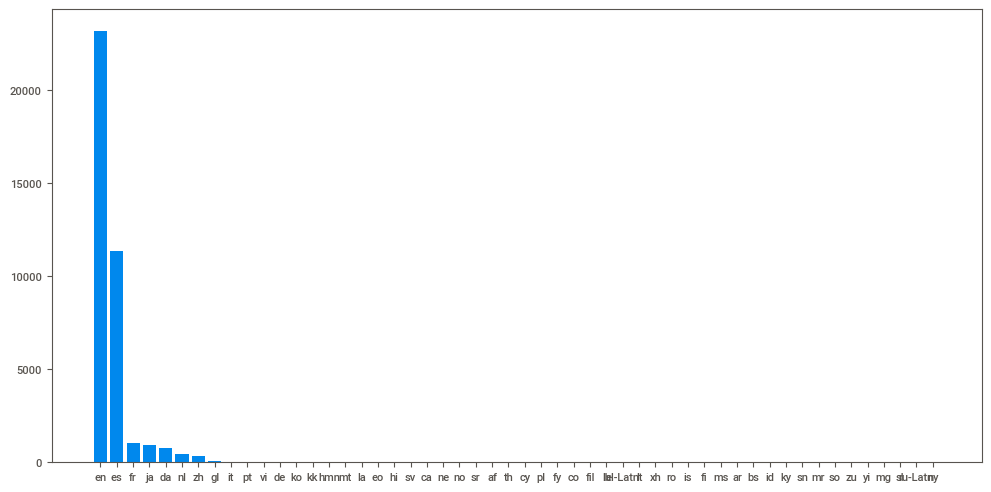

In [51]:
# train_df
plt.figure(figsize=(12,6))
plt.bar(x=train_df["Description_lang"].value_counts().index, 
        height=train_df["Description_lang"].value_counts().values)

<BarContainer object of 43 artists>

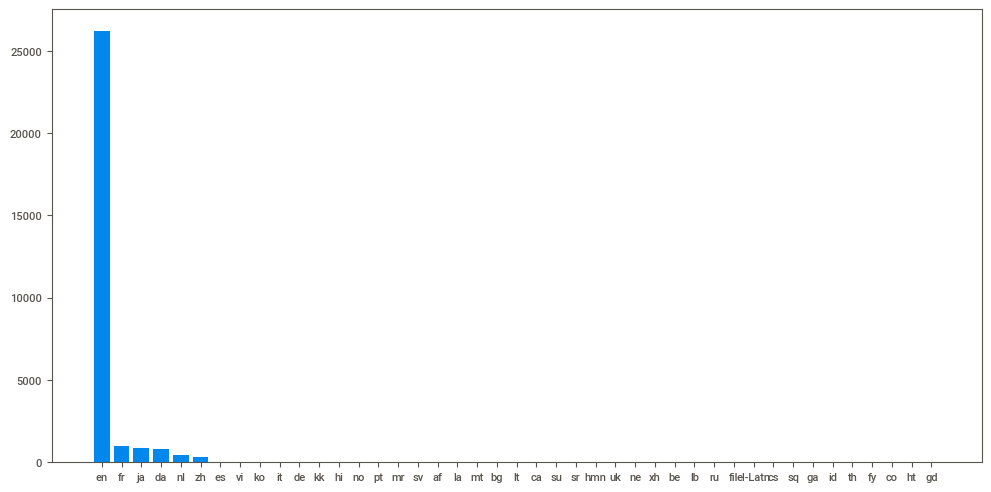

In [52]:
# test_df
plt.figure(figsize=(12,6))
plt.bar(x=test_df["Description_lang"].value_counts().index, 
        height=test_df["Description_lang"].value_counts().values)

## トークン数

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [212. 260. 311. 733.]
Number of out of 512:  418 (1.058951688495934%)
Number of out of 1024:  0 (0.0%)


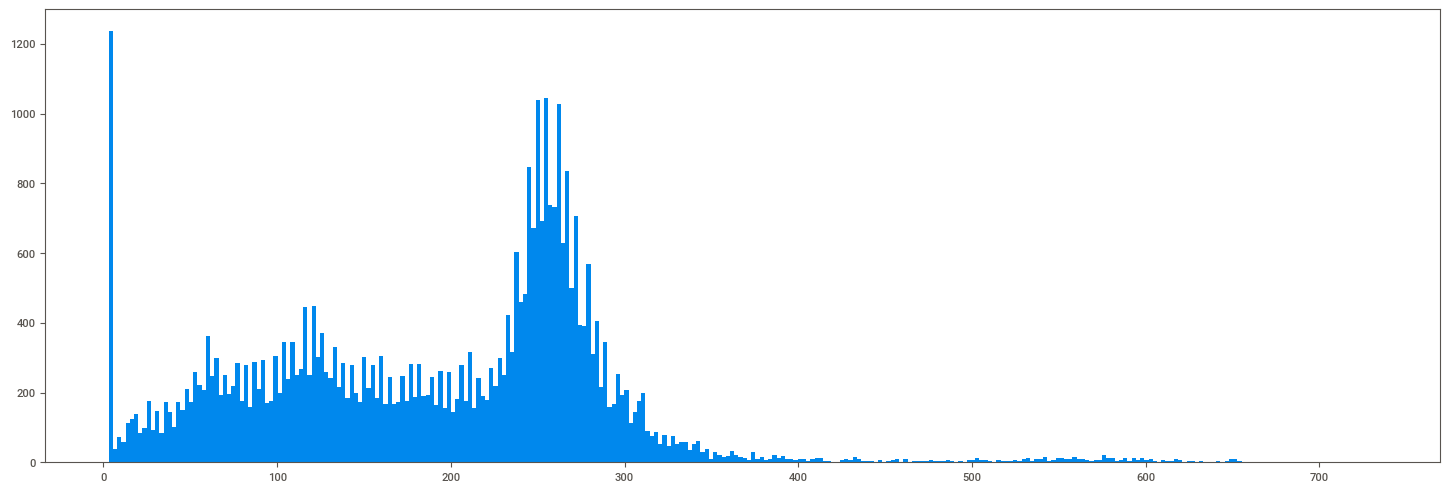

In [53]:
print_plot_token_num(train_df, "Description", 300)

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [243. 267. 322. 719.]
Number of out of 512:  367 (1.2117810209337647%)
Number of out of 1024:  0 (0.0%)


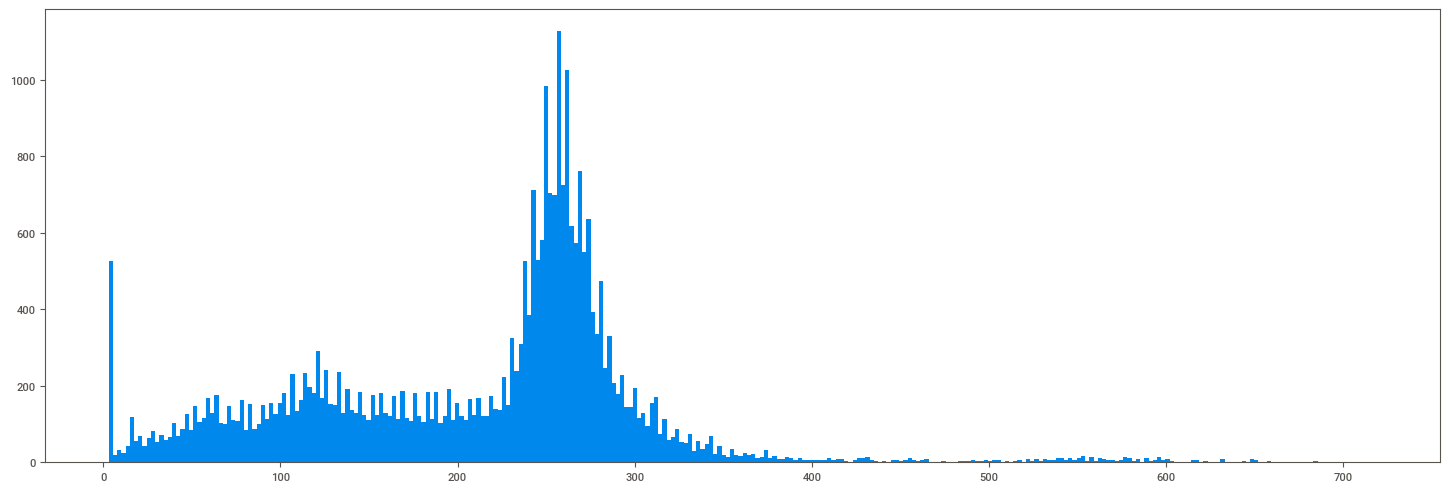

In [54]:
print_plot_token_num(test_df, "Description", 300)

## 翻訳

In [8]:
!pip install git+https://github.com/alainrouillon/py-googletrans@feature/enhance-use-of-direct-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/alainrouillon/py-googletrans (to revision feature/enhance-use-of-direct-api) to /tmp/pip-req-build-hbxkqoz9
  Running command git clone -q https://github.com/alainrouillon/py-googletrans /tmp/pip-req-build-hbxkqoz9
  Running command git checkout -b feature/enhance-use-of-direct-api --track origin/feature/enhance-use-of-direct-api
  Switched to a new branch 'feature/enhance-use-of-direct-api'
  Branch 'feature/enhance-use-of-direct-api' set up to track remote branch 'feature/enhance-use-of-direct-api' from 'origin'.
     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 1.5 MB 10.3 MB/s 
     |████████████████████████████████| 42 kB 245 kB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-

In [33]:
from googletrans import Translator

src = train_df['Description'][39470]

#tr = Translator()
tr = Translator(service_urls=['translate.googleapis.com'])
while True:
  try:
    text = tr.translate(src, dest="en").text
    break
  except Exception as e:
    tr = Translator(service_urls=['translate.googleapis.com'])

# PropertyType
宿泊施設の種類



* カテゴリでもいいけどBertで処理した方が似たもの同士を判別できるかも


## トークン数

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [ 6.  7. 10. 12.]
Number of out of 512:  0 (0.0%)
Number of out of 1024:  0 (0.0%)


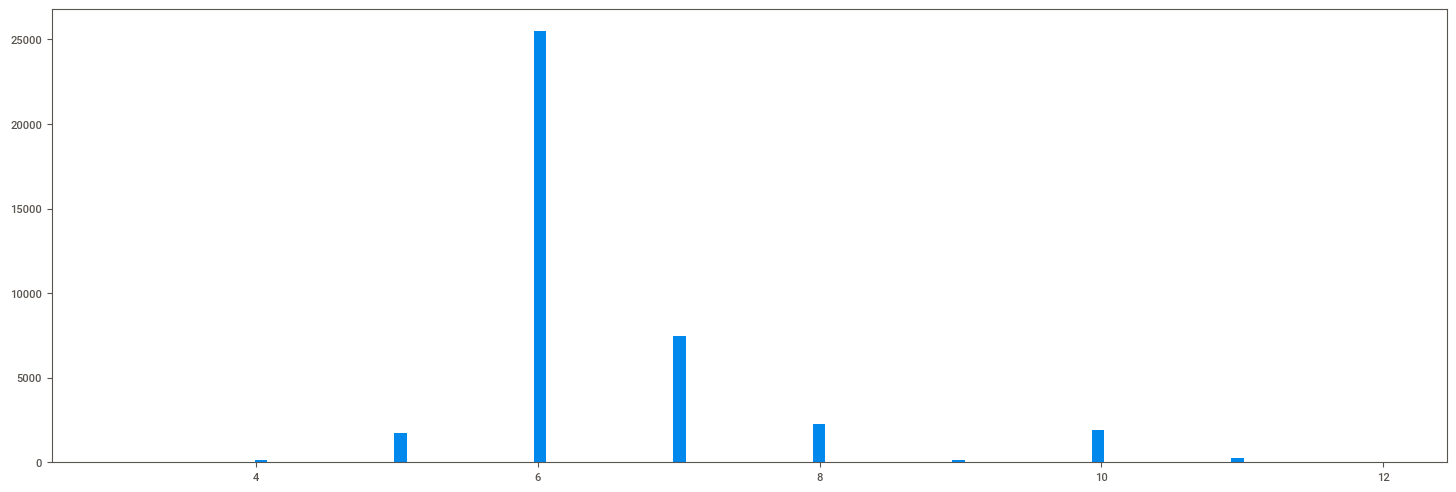

In [59]:
print_plot_token_num(train_df, "PropertyType", 100)

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [ 6.  7.  8. 12.]
Number of out of 512:  0 (0.0%)
Number of out of 1024:  0 (0.0%)


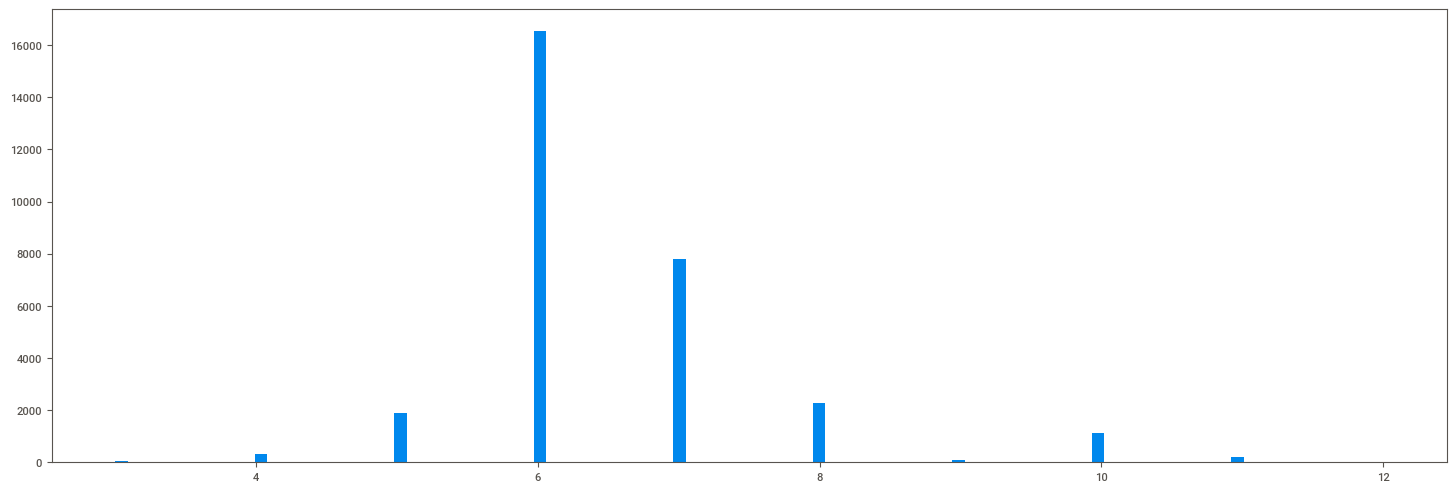

In [60]:
print_plot_token_num(test_df, "PropertyType", 100)

## 要素の集合

In [124]:
# 使われている単語を取り出し
sets = set()
for i in range(len(train_df)):
    if ((train_df["PropertyType"][i] is np.nan) == False):
        sets = sets.union(set(train_df["PropertyType"][i].lower().split(" ")))

In [128]:
print(len(sets))
print(sets)

65
{'boutique', 'island', 'hostel', 'particular', 'floor', 'bungalow', 'pension', 'stay', 'bus', 'private', 'cabin', 'serviced', 'bed', 'boat', 'room', 'hut', 'loft', 'camper/rv', '(condo)', 'farm', 'residential', 'lodge', 'castle', 'tent', 'townhouse', 'barn', 'breakfast', 'campsite', 'houseboat', 'chalet', 'entire', 'cycladic', 'home/apt', 'train', 'casa', 'car', 'hotel', 'guest', 'villa', 'suite', 'guesthouse', 'tiny', 'dome', 'home', 'aparthotel', 'tower', 'nature', 'and', 'treehouse', 'condominium', 'earth', 'shared', 'ryokan', 'dorm', 'rental', 'unit', 'house', 'place', 'in-law', 'resort', 'yurt', 'apartment', 'tipi', 'in', 'cottage'}


# RoomType
部屋の種類

In [116]:
train_df[["PropertyType", "RoomType","BathroomsText"]]

,PropertyType,RoomType,BathroomsText
0,Private room in residential home,Private room,2 shared baths
1,Entire rental unit,Entire home/apt,2.5 baths
2,Private room in rental unit,Private room,1 bath
3,Entire condominium (condo),Entire home/apt,1 bath
4,Entire rental unit,Entire home/apt,1 bath
...,...,...,...
39468,Entire residential home,Entire home/apt,1.5 baths
39469,Entire rental unit,Entire home/apt,1 bath
39470,Entire rental unit,Entire home/apt,1 bath
39471,Private room in residential home,Private room,1 shared bath


# MaximumAccommodates
*物件の最大収容人数*

# InstantBookabl	
*オーナーによる予約要求の認証を必要とせず、自動予約できるかどうか*

# BathroomsText	
*風呂の詳細*

* １Bath、２Bathとかなので、数値化する。またはBartで処理してもそこら辺判断してくれるかも  



In [129]:
# 使われている単語を取り出し
sets = set()
for i in range(len(train_df)):
    if ((train_df["BathroomsText"][i] is np.nan) == False):
        sets = sets.union(set(train_df["BathroomsText"][i].split(" ")))

In [130]:
print(len(sets))
print(sets)

35
{'Half-bath', '30', 'private', '3.5', 'Private', '16', '12', 'shared', '9', 'bath', '19.5', '11', '2', 'Shared', '7', '7.5', 'half-bath', '20', '1.5', '4', '2.5', '5.5', '4.5', '6.5', '8', '8.5', 'baths', '3', '6', '15.5', '24', '5', '1', '0', '10'}


# Beds	
*ベッドの数*


* Bedsが多いのにPriceが低い外れ値がある→建物全体のベット数を記載しているのではないか→Bedroomで割るorデータの95％点とかに合わせる
*   重要そうだったら考える



In [112]:
train_df.query("Beds > 10")

,ID,OwnerID,OwnerSince,TimeToReply,ReplyRate,AcceptanceRate,IdentityVerified,Verifications,ListingsCount,HasPicture,OwnerDetail,Description,PropertyType,RoomType,MaximumAccommodates,InstantBookable,BathroomsText,Beds,Amenities,Bedrooms,AreaCategory,Latitude,Longitude,Availability,Vacancy30,Vacancy60,Vacancy90,Vacancy365,UserRatingOverall,UserRatingInformation,UserRatingCleanliness,UserRatingCheckin,UserRatingCommunication,UserRatingLocation,UserRatingPrice,NumberOfReviews,NumberOfReviews1m,NumberOfReviews1y,FirstReview,LastReview,ReviewsPerMonth,Price,OwnerDetail_lang,is_text_OwnerDetail,is_text_Description,Description_lang,PropertyType_lang
307,307,1853,20120305.0,within an hour,100%,61%,t,"[""email"", ""phone"", ""reviews"", ""jumio"", ""govern...",20.0,t,NaN,Rooms to rent in the emblematic district of Al...,Private room in residential home,Private room,15,f,6 baths,14.0,Iron Free street parking Heating Host greets y...,8.0,Almagro,-34.61,-58.42,t,11,21,32,178,4.67,4.67,4.67,5.00,5.00,4.67,5.00,4,0,0,20121124.0,20171205.0,0.04,1772,NaN,False,False,en,en
309,309,19455,20121212.0,within a few hours,100%,100%,t,"[""email"", ""phone"", ""facebook"", ""reviews"", ""jum...",0.0,t,In 2012 gooide ik het roer om. Na 15 jaar in l...,"Op het betoverende eiland NDSM ligt Bracksand,...",Boat,Entire home/apt,16,f,5.5 baths,24.0,Crib Coffee maker Babysitter recommendations C...,8.0,Oud-Noord,52.40,4.89,t,18,40,70,321,4.92,4.85,4.77,4.92,4.85,4.85,4.46,13,0,1,20191222.0,20200210.0,0.62,105172,nl,False,False,nl,sl
618,618,7155,20130210.0,within a day,100%,67%,f,"[""email"", ""phone"", ""facebook"", ""reviews"", ""jum...",2.0,t,We're Olaf & Nicci\nWe're the proud owners of ...,De Waterwolf is gebouwd in 1898 en voorzien va...,Private room in boat,Private room,16,f,4 baths,20.0,Coffee maker Long term stays allowed Patio or ...,10.0,Oud-Noord,52.40,4.90,t,0,4,34,157,4.89,4.67,4.89,4.78,4.83,4.61,4.78,18,0,0,20190310.0,20190127.0,0.59,57449,en,False,False,nl,sl
1283,1283,1853,20120305.0,within an hour,100%,61%,t,"[""email"", ""phone"", ""reviews"", ""jumio"", ""govern...",20.0,t,NaN,Rooms to rent in the emblematic district of Al...,Private room in residential home,Private room,15,f,6 baths,15.0,Bed linens Host greets you Dedicated workspace...,8.0,Almagro,-34.61,-58.42,t,9,16,28,205,4.68,4.83,4.83,4.92,4.75,4.33,4.67,26,0,0,20130605.0,20130320.0,0.26,1107,NaN,False,False,en,en
1599,1599,851,20170921.0,within an hour,100%,100%,t,"[""email"", ""phone"", ""offline_government_id"", ""s...",1.0,t,My husband Bent and I live in Copenhagen with ...,"Beautiful, old villa with garden on a quiet st...",Entire villa,Entire home/apt,15,t,2 baths,12.0,Washer Shampoo Heating Private entrance Wifi O...,7.0,Vanlse,55.69,12.48,t,0,0,0,0,5.00,5.00,5.00,5.00,5.00,5.00,4.67,3,0,1,20190730.0,20190721.0,0.11,43373,en,False,False,en,it
2227,2227,438,20160801.0,within an hour,100%,100%,t,"[""email"", ""phone"", ""jumio"", ""selfie"", ""governm...",50.0,t,"Venezolano, emprendedor en Argentina del stude...",Habitaciones compartidas con diseño moderno y ...,Room in bed and breakfast,Hotel room,1,t,2.5 shared baths,14.0,Bed linens Host greets you Dedicated workspace...,1.0,Recoleta,-34.59,-58.40,t,30,60,90,365,4.00,5.00,4.00,4.50,5.00,5.00,4.00,2,0,0,20190704.0,20200317.0,0.07,1107,sv,False,False,es,en
3158,3158,438,20160801.0,within an hour,100%,100%,t,"[""email"", ""phone"", ""jumio"", ""selfie"", ""governm...",50.0,t,"Venezolano, emprendedor en Argentina del stude...",Habitaciones compartidas con diseño moderno y ...,Room in bed and breakfast,Hotel room,1,t,2.5 shared baths,14.0,Bed linens Host greets you Dedicated workspace...,1.0,Recoleta,-34.59,-58.40,t,30,60,90,365,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,0,0,20200119.0,20200119.0,0.05,1107,sv,False,False,es,en
3455,3455,438,20160801.0,within an hour,100%,100%,t,"[""email"", ""phone"", ""jumio"", ""selfie"", ""governm...",50.0,t,"Venezolano, emprendedor en Argentina del stude...",Habitaciones compartidas con diseño moder

# Bedrooms
寝室の数

* Beds < Bedsroomの場合は部屋数を書いている可能性がある→ベットルームは１つとする


In [113]:
train_df.query("Bedrooms > 10")

,ID,OwnerID,OwnerSince,TimeToReply,ReplyRate,AcceptanceRate,IdentityVerified,Verifications,ListingsCount,HasPicture,OwnerDetail,Description,PropertyType,RoomType,MaximumAccommodates,InstantBookable,BathroomsText,Beds,Amenities,Bedrooms,AreaCategory,Latitude,Longitude,Availability,Vacancy30,Vacancy60,Vacancy90,Vacancy365,UserRatingOverall,UserRatingInformation,UserRatingCleanliness,UserRatingCheckin,UserRatingCommunication,UserRatingLocation,UserRatingPrice,NumberOfReviews,NumberOfReviews1m,NumberOfReviews1y,FirstReview,LastReview,ReviewsPerMonth,Price,OwnerDetail_lang,is_text_OwnerDetail,is_text_Description,Description_lang,PropertyType_lang
710,710,42644,20210210.0,NaN,NaN,NaN,f,"[""email"", ""phone"", ""work_email""]",0.0,t,NaN,"Enmarcado en pleno corazón de Recoleta, el bar...",Entire rental unit,Entire home/apt,2,t,1 bath,2.0,Heating Smoke alarm Fire extinguisher Building...,30.0,Retiro,-34.59,-58.38,t,30,60,90,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,7421,NaN,False,False,es,fr
4642,4642,20450,20190218.0,within an hour,100%,100%,f,"[""email"", ""phone""]",0.0,t,NaN,Be Hollywood hotel se suma al tono vanguardist...,Room in boutique hotel,Private room,16,t,1 private bath,2.0,Iron Pool Heating Smoke alarm Carbon monoxide ...,41.0,Palermo,-34.58,-58.43,t,0,0,0,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,115604,NaN,False,False,es,en
5601,5601,14622,20120824.0,within a few hours,100%,NaN,f,"[""email"", ""phone"", ""reviews"", ""jumio""]",6.0,t,"Hi, I am Henri, owner of the authentic traditi...",Located in the hip and upcoming area NDSM in t...,Private room in boat,Private room,16,f,4 shared baths,32.0,Hot water Essentials Fire extinguisher First a...,12.0,Westerpark,52.39,4.88,t,0,5,32,307,4.54,4.49,4.51,4.73,4.71,4.12,4.36,73,0,0,20130103.0,20200302.0,0.69,10763,en,False,False,en,sl
5799,5799,31410,20111213.0,within a day,86%,100%,t,"[""phone"", ""facebook"", ""reviews"", ""jumio"", ""off...",1.0,t,NaN,Hotel Boutique ubicado en el centro del barrio...,Room in boutique hotel,Private room,16,t,15.5 baths,16.0,Iron First aid kit Heating Lock on bedroom doo...,15.0,San Telmo,-34.63,-58.37,t,30,60,90,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,3932,NaN,False,False,es,en
6591,6591,13792,20200330.0,a few days or more,0%,33%,f,"[""email"", ""phone""]",0.0,t,NaN,Esta es una casa única de estilo Frances del a...,Private room in residential home,Private room,16,f,1 shared bath,NaN,Lock on bedroom door Fire extinguisher Kitchen...,20.0,Chacarita,-34.58,-58.46,t,22,52,82,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,1112,NaN,False,False,es,en
6615,6615,14622,20120824.0,within a few hours,100%,NaN,f,"[""email"", ""phone"", ""reviews"", ""jumio""]",6.0,t,"Hi, I am Henri, owner of the authentic traditi...",Located in the hip and upcoming area NDSM in t...,Private room in boat,Private room,16,f,4 shared baths,32.0,Hot water Essentials Fire extinguisher First a...,12.0,Oud-Noord,52.40,4.90,t,0,5,35,215,4.40,4.30,4.30,4.80,4.70,4.50,4.20,10,0,0,20200101.0,20200308.0,0.49,10763,en,False,False,en,sl
15304,15306,12044,20140425.0,NaN,NaN,NaN,t,"[""email"", ""phone"", ""reviews"", ""jumio"", ""offlin...",7.0,t,Nos dedicamos al Turismo desde inicio del 2013...,El Hotel First Palermo cuenta con 16 habitacio...,Entire place,Entire home/apt,16,t,16 baths,23.0,Pool Heating Smoke alarm Kitchen Fire extingui...,16.0,Palermo,-34.59,-58.43,t,30,51,81,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,168481,es,False,False,es,en
17763,17765,10904,20200429.0,within a few hours,100%,NaN,t,"[""email"", ""phone"", ""offline_government_id"", ""s...",0.0,t,Somos una empresa dedicada a la hospitalidad!!!,Superando todas las atribuciones que deben ten...,Room in boutique hotel,Private room,16,t,1 private bath,40.0,Pool Heating Smoke alarm Free parking on premi...,20.0,Monserrat,-34.62,-58.38,t,29,59,89,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,9414,es,False,False,es,en
19704,19706,35947,20181123.0,NaN,NaN,NaN,t,"[""email"", ""phone"", ""

# Amenities	
アメニティ



*   アメニティの個数を特徴量にする



分解して集合

In [64]:
# 分解して集合にする
sets = set()
for i in range(len(train_df)):
    sets = sets.union(set(train_df["Amenities"][i].replace("[", "").replace('"', "").replace(']', "").split(",")))

In [65]:
len(sets)

1923

## 言語判定

In [66]:
# 不要な文字を削除
col = "Amenities"
train_df[col] = train_df[col].apply(lambda x: x.replace("[", "").replace('"', "").replace(',', "").replace(']', ""))
test_df[col] = test_df[col].apply(lambda x: x.replace("[", "").replace('"', "").replace(',', "").replace(']', ""))

In [107]:
# 言語判定
# train_df = add_lang_OD(train_df, "Amenities")
# test_df = add_lang_OD(test_df, "Amenities")

In [108]:
# train_df
# plt.figure(figsize=(12,6))
# plt.bar(x=train_df["Amenities_lang"].value_counts().index, 
#         height=train_df["Amenities_lang"].value_counts().values)

In [109]:
# plt.figure(figsize=(12,6))
# plt.bar(x=test_df["Amenities_lang"].value_counts().index, 
#         height=test_df["Amenities_lang"].value_counts().values)

In [110]:
# train_df[train_df["Amenities_lang"]=="de"][["Amenities", "Amenities_lang"]]

## トークン数

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [ 63.  91. 142. 486.]
Number of out of 512:  0 (0.0%)
Number of out of 1024:  0 (0.0%)


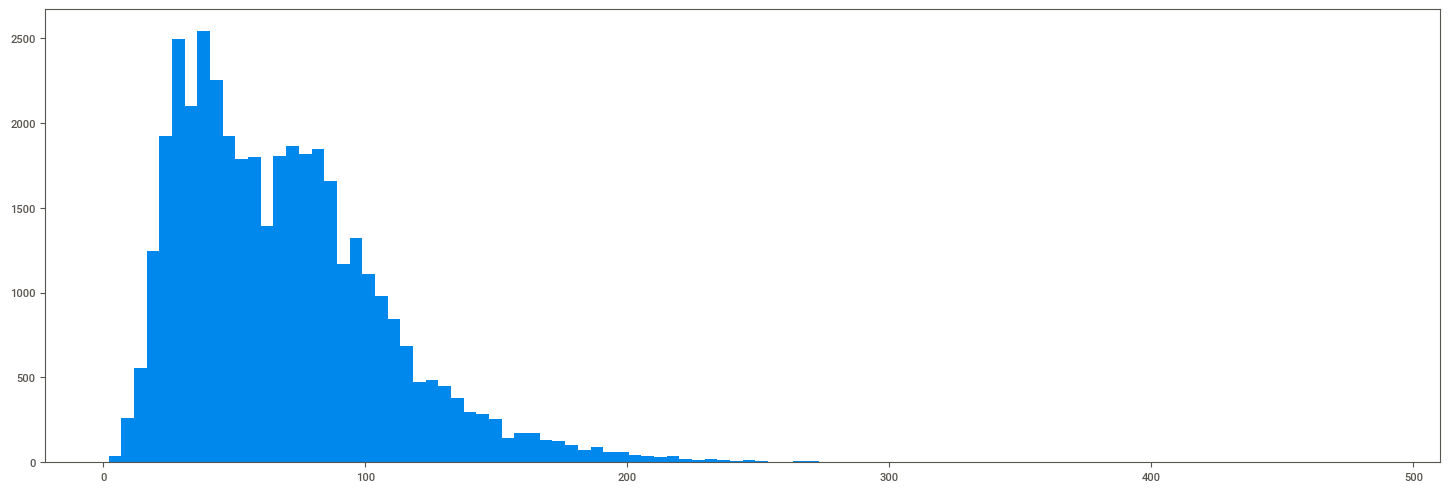

In [76]:
print_plot_token_num(train_df, "Amenities", 100)

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [ 71. 101. 163. 472.]
Number of out of 512:  0 (0.0%)
Number of out of 1024:  0 (0.0%)


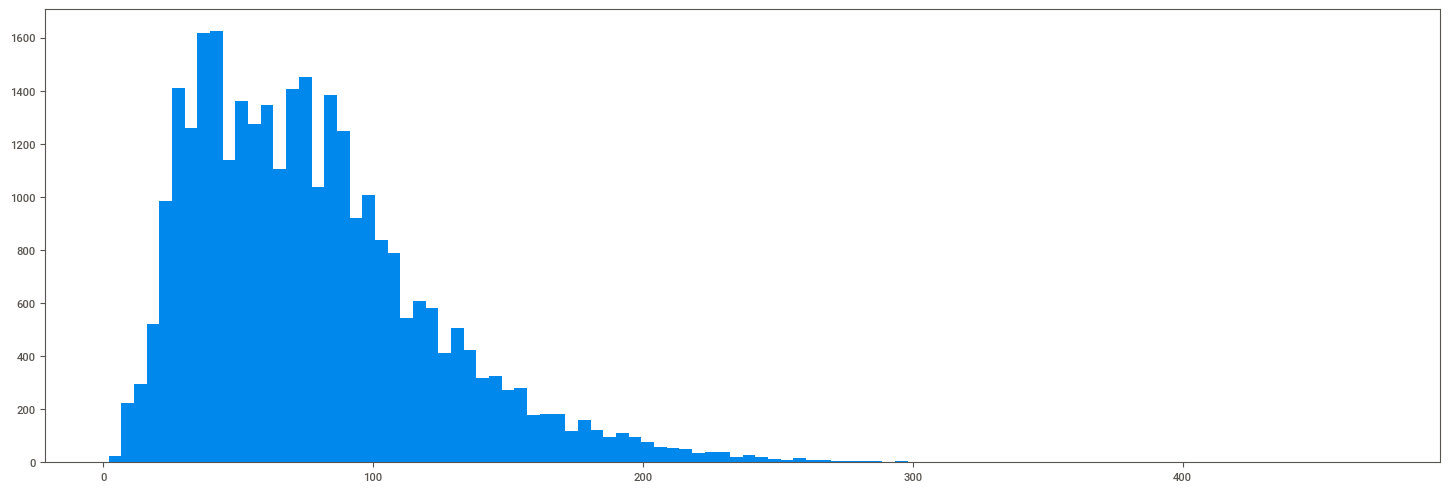

In [77]:
print_plot_token_num(test_df, "Amenities", 100)

# AreaCategory	
近隣地域

Taito Ku のように都市単位



*   Bert or カテゴリ変数として扱う



# Latitude/Longitude
物件の緯度／経度







*   地域に偏りあり：訓練データブエノスアイレスが多くテストデータはオーストラリアが多い
*国や都市名を特徴量にする
*緯度経度だけより、所在地や最寄り駅も説明変数に入れたほうが予測精度が高い。重要度も緯度経度より所在地や最寄り駅のほうが高い。おそらく地域ごとに相場が決まっているため、地域を表す変数 (所在地や最寄り駅など) を説明変数に入れたほうがよさそう。　ほぼ同じ場所に異なる駅が複数ある (秋葉原と岩本町、など)。主要駅に絞った上で最寄り駅を求めたほうがよさそう。


In [79]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import folium
from folium.plugins import MarkerCluster

# このCSVには、県庁所在地の緯度・経度がlatitudeカラムとlongitudeカラムに入っている。
df = pd.DataFrame(index=[], columns=["latitude", "longitude"])
# df["latitude"] = train_df[train_df["OwnerDetail_lang"]=="ja"]["Latitude"]
# df["longitude"] = train_df[train_df["OwnerDetail_lang"]=="ja"]["Longitude"]
df["latitude"] = train_df["Latitude"]
df["longitude"] = train_df["Longitude"]
df = df.reset_index()

def visualize_locations(df,  zoom=2):
    """日本を拡大した地図に、pandasデータフレームのlatitudeおよびlongitudeカラムをプロットする。
    """
        	
    # 図の大きさを指定する。
    f = folium.Figure(width=1200, height=600)

    # 初期表示の中心の座標を指定して地図を作成する。
    center_lat=35
    center_lon=139
    m = folium.Map([center_lat,center_lon], zoom_start=zoom).add_to(f)

    # 縮尺によって、マーカーがまとめられるように設定する。
    marker_cluster = MarkerCluster().add_to(m)
        
    # データフレームの全ての行のマーカーを作成する。
    for i in range(0,len(df)):
        folium.Marker(location=[df["latitude"][i],df["longitude"][i]]).add_to(marker_cluster)
        
    return m
    
visualize_locations(df)

Output hidden; open in https://colab.research.google.com to view.

In [81]:
# このCSVには、県庁所在地の緯度・経度がlatitudeカラムとlongitudeカラムに入っている。
df = pd.DataFrame(index=[], columns=["latitude", "longitude"])
df["latitude"] = test_df["Latitude"]
df["longitude"] = test_df["Longitude"]
df = df.reset_index()

visualize_locations(df)

Output hidden; open in https://colab.research.google.com to view.

# Availability	
予約可能かどうか

# Vacancy30/Vacancy60/Vacancy90/Vacancy365
n日以内で何日予約可能か

多いほど人気ってことか

In [82]:
train_df.loc[:,["Vacancy30","Vacancy60","Vacancy90","Vacancy365","Price"]].corr()

,Vacancy30,Vacancy60,Vacancy90,Vacancy365,Price
Vacancy30,1.000000,0.962367,0.922677,0.573991,-0.069790
Vacancy60,0.962367,1.000000,0.983361,0.624678,-0.081371
Vacancy90,0.922677,0.983361,1.000000,0.657456,-0.087811
Vacancy365,0.573991,0.624678,0.657456,1.000000,-0.073014
Price,-0.069790,-0.081371,-0.087811,-0.073014,1.000000


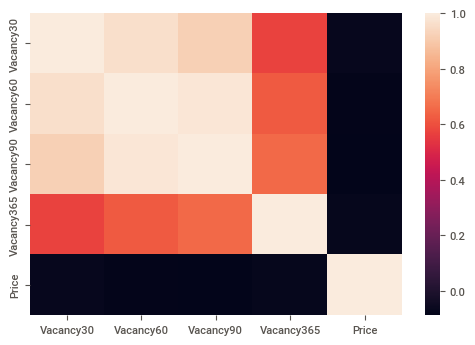

In [83]:
sns.heatmap(train_df.loc[:,["Vacancy30","Vacancy60","Vacancy90","Vacancy365","Price"]].corr())

In [27]:
# 全て０
train_df.loc[:,["Vacancy30","Vacancy60","Vacancy90","Vacancy365","Price"]].query("(Vacancy30 == 29) & (Vacancy60 == 59) & (Vacancy90 == 89)").head(100)

,Vacancy30,Vacancy60,Vacancy90,Vacancy365,Price
3,29,59,89,364,5697
19,29,59,89,364,9414
21,29,59,89,364,11630
24,29,59,89,89,3370
34,29,59,89,364,2808
41,29,59,89,364,4431
50,29,59,89,89,8862
64,29,59,89,364,1329
78,29,59,89,364,1882
92,29,59,89,364,14399


# UserRating-Overall/Information/Checkin/Communication/Location/Price
「全レビュー」/「情報の正確さ」/「物件の綺麗さ」/「チェックイン」/「オーナーのコミュニケーション」/「物件のロケーション」/「価格」/のレビュースコアの平均

In [84]:
train_df.loc[:,["UserRatingOverall","UserRatingInformation","UserRatingCleanliness","UserRatingCheckin","UserRatingCommunication","UserRatingLocation","UserRatingPrice","Price"]].corr()

,UserRatingOverall,UserRatingInformation,UserRatingCleanliness,UserRatingCheckin,UserRatingCommunication,UserRatingLocation,UserRatingPrice,Price
UserRatingOverall,1.000000,0.790501,0.730661,0.633233,0.692326,0.495391,0.774529,0.006089
UserRatingInformation,0.790501,1.000000,0.665526,0.662282,0.697704,0.495622,0.719027,0.008831
UserRatingCleanliness,0.730661,0.665526,1.000000,0.516673,0.537443,0.406775,0.653568,0.010092
UserRatingCheckin,0.633233,0.662282,0.516673,1.000000,0.732071,0.521600,0.579870,-0.000742
UserRatingCommunication,0.692326,0.697704,0.537443,0.732071,1.000000,0.516783,0.633904,0.006655
UserRatingLocation,0.495391,0.495622,0.406775,0.521600,0.516783,1.000000,0.530124,-0.021406
UserRatingPrice,0.774529,0.719027,0.653568,0.579870,0.633904,0.530124,1.000000,-0.022756
Price,0.006089,0.008831,0.010092,-0.000742,0.006655,-0.021406,-0.022756,1.000000


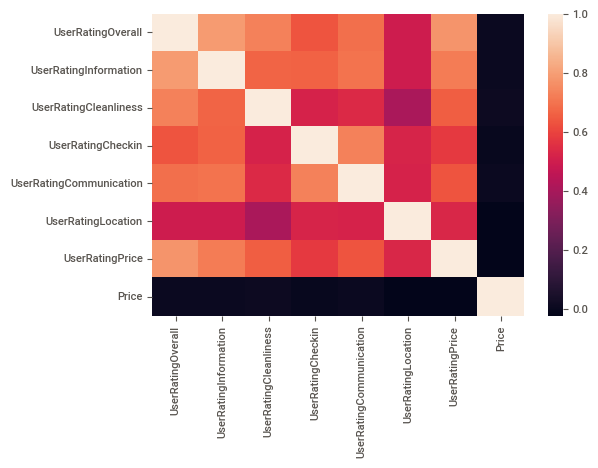

In [85]:
sns.heatmap(train_df.loc[:,["UserRatingOverall","UserRatingInformation","UserRatingCleanliness","UserRatingCheckin","UserRatingCommunication","UserRatingLocation","UserRatingPrice","Price"]].corr())

# NumberOfReviews	
レビューの総数

# NumberOfReviews1m/NumberOfReviews1y
直近１ヶ月以内/１年以内のレビューの数



# FirstReview/LastReview
最初/最後のレビューの日付

*   連結して数値に変換
*   年、月を抽出
*FirstReviewとLastReviewとの差
*OwnerSinceとの差

In [86]:
train_df = transform_date(train_df, "FirstReview")
test_df = transform_date(test_df, "FirstReview")

train_df = transform_date(train_df, "LastReview")
test_df = transform_date(test_df, "LastReview")

FirstReviewとPriceとの関係

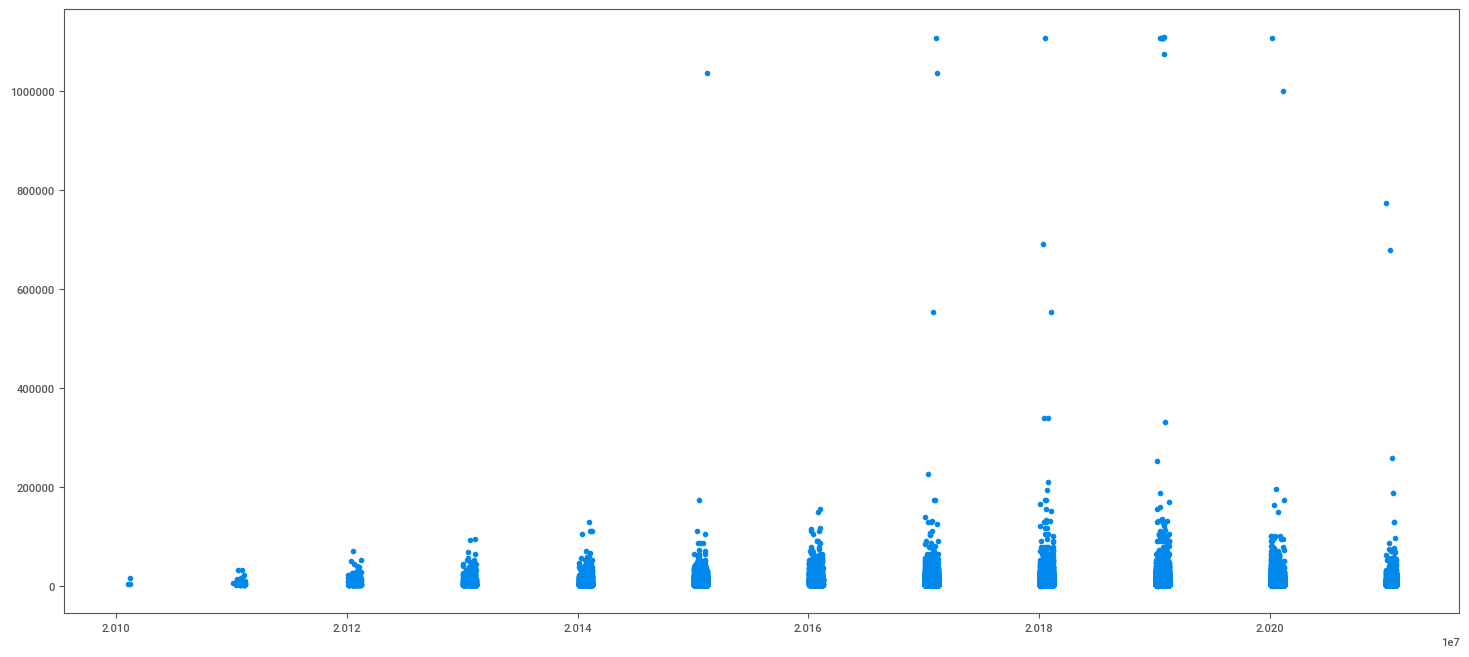

In [87]:
plt.figure(figsize=(18,8))
plt.scatter(train_df["FirstReview"], train_df["Price"])
plt.ticklabel_format(style='plain',axis="y")

FirstReviewとLastReviewとの関係

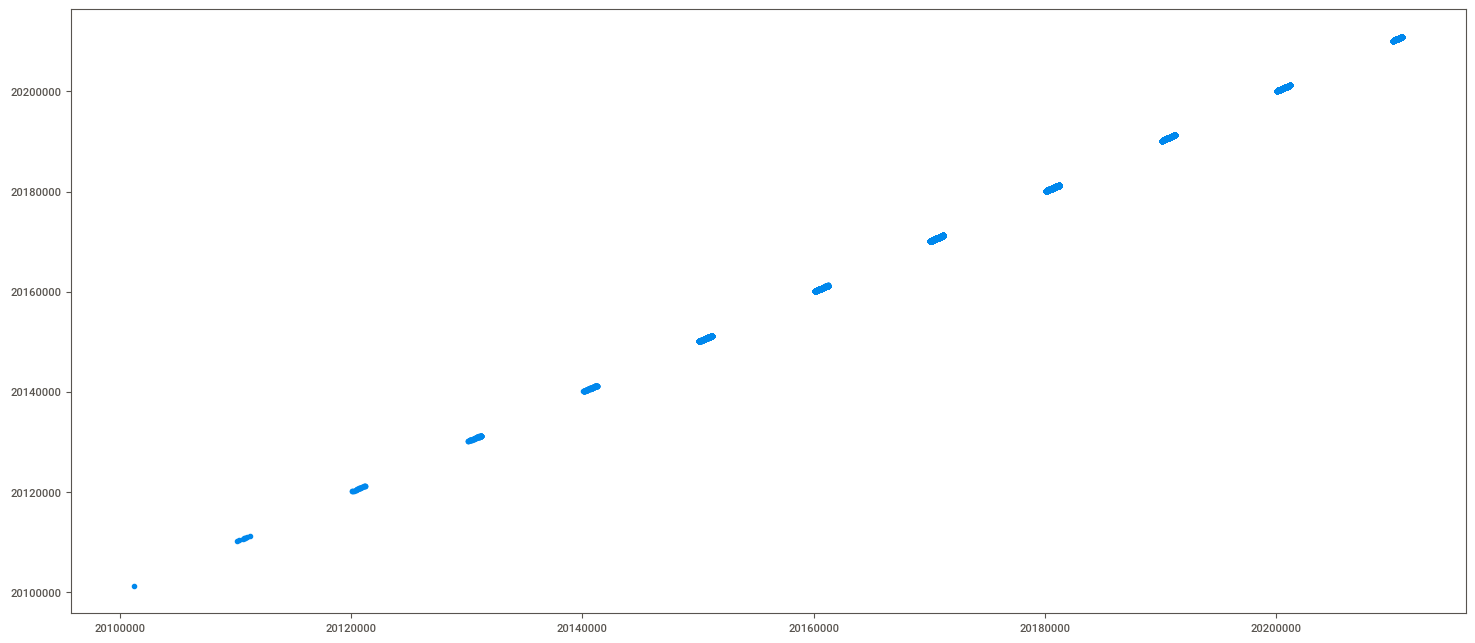

In [88]:
plt.figure(figsize=(18,8))
plt.scatter(train_df["LastReview"], train_df["LastReview"])
plt.ticklabel_format(style='plain',axis="y")
plt.ticklabel_format(style='plain',axis="x")

# ReviewsPerMonth
レビューの月平均数

# review.csv
train.csv, test.csvのIDと紐付けされています。


*   一つのIDに対して複数のレコードがある←train_df,test_dfとの結合方法をどうするか
* ひとつのレコードに文を結合
*分散表現にして平均を取る


In [89]:
review_df.head(10)

,ID,ReviewerId,ReviewerName,Review
0,6,12789,Maria Pilar,"El departamento tiene una ubicación excelente,..."
1,6,52100,Vanina,"Muy buena atencion, limpieza y lugar excelente"
2,6,179615,Héctor,El lugar tiene una ubicació excelente de fáci...
3,6,13922,Adrian,10 puntos
4,6,31359,Maximiliano,"lindo dpto, zona excelente."
5,6,162812,Miriam,"Muchas gracias Raúl, por tu excelente atención..."
6,6,131588,Mariano,Excelente dpto. Tiene todo lo necesario. <br/>...
7,6,1739,Lorena,"Excelente hospitalidad, muy buena ubicación y ..."
8,6,77964,Pamela,El departamento cuando llegamos estaba ya el d...
9,6,46444,Dolores,Raul was very nice and the place was awesome.


複数のReviewをしているReviewerIdあり

In [90]:
review_df["ReviewerId"].value_counts()

25215     107
115051     40
152117     39
182152     28
164847     27
         ... 
18359       1
35212       1
174280      1
24615       1
141354      1
Name: ReviewerId, Length: 192280, dtype: int64

一つのIDに対して複数のReviewがある

In [91]:
review_df["ID"].value_counts()

7393     323
29152    292
39815    285
51151    280
4592     204
        ... 
45388      1
16187      1
61855      1
2120       1
30065      1
Name: ID, Length: 25045, dtype: int64

# Review

ReviewがあるIDは結構少ない（特に学習データ）

In [92]:
# IDのカバー率
print("train:", len(review_df[review_df["ID"]<train_df["ID"].iloc[-1]]["ID"].value_counts()) / len(train_df))
print("test:", len(review_df[review_df["ID"]>train_df["ID"].iloc[-1]]["ID"].value_counts()) / len(test_df))

train: 0.27266739290147696
test: 0.4715710229148782


## 言語判定


*   long tokenの扱いを考える
*   名前は文中に組み込んでもいいかも



In [93]:
review_df = add_lang_OD(review_df, "Review")

<BarContainer object of 95 artists>

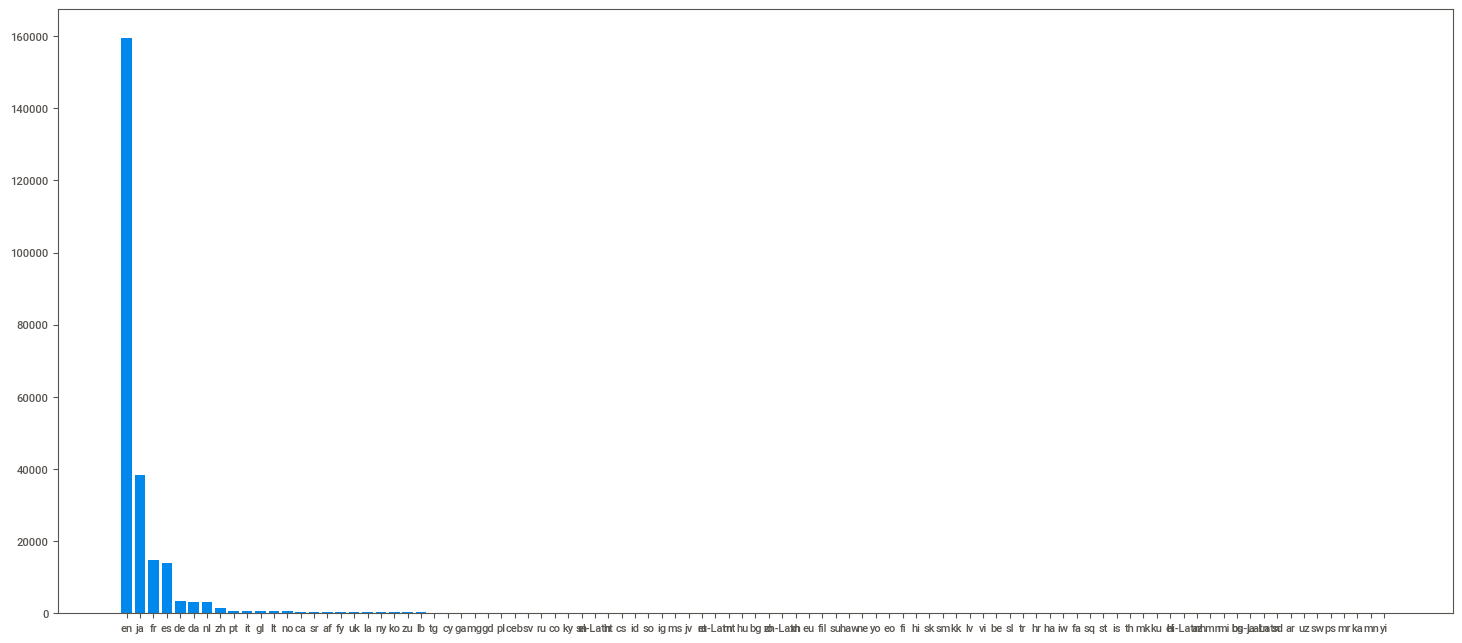

In [94]:
plt.figure(figsize=(18,8))
plt.bar(x=review_df["Review_lang"].value_counts().index, 
        height=review_df["Review_lang"].value_counts().values)

## トークン数

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [  28.   52.  118. 2359.]
Number of out of 512:  176 (0.07128825161512445%)
Number of out of 1024:  14 (0.0056706563784758085%)


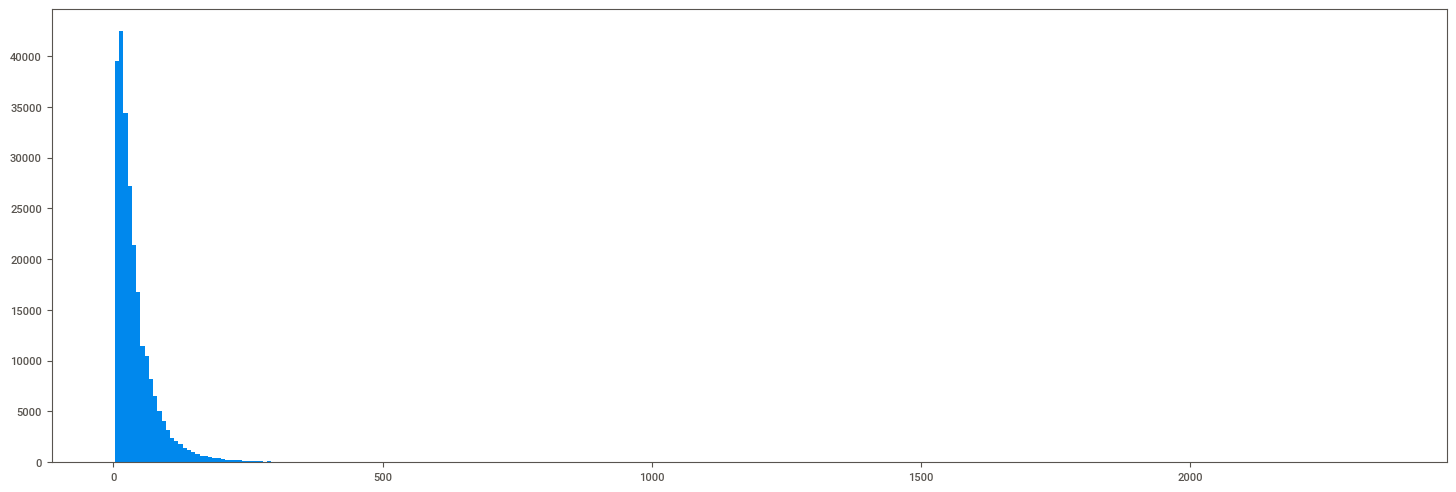

In [95]:
print_plot_token_num(review_df, "Review", 300)

同じIDの文と文を結合

In [96]:
# np.nanを"NAN"に置換
for col in ["ReviewerName", "Review"]:
    review_df = review_df.replace({col: {np.nan: 'NAN'}})

In [97]:
id_list = []
text_list = []
for id in review_df["ID"].value_counts().index:
    df = review_df[review_df["ID"]==id]
    text = ""
    for i in range(len(df)):
        text = text + " " + df.iloc[i,2] + " " + df.iloc[i,3]
    id_list.append(id)
    text_list.append(text)

In [98]:
new_review_df = pd.DataFrame({"ID": id_list,
                              "Review": text_list})
new_review_df.head()

,ID,Review
0,7393,優美 とても綺麗で､床暖房もあり快適に過ごせました｡すぐ近くにｺﾝﾋﾞﾆがあるのもありがた...
1,29152,田中 お部屋も綺麗ですし､対応していただいたﾌﾛﾝﾄの方も丁寧で優しかったです｡ ゆかり ...
2,39815,Axel Honnêtement nous avons passer un super v...
3,51151,Kaori とてもお洒落な内装に広い奥行きのある空間｡ゆったり過ごせる部屋になっており､長...
4,4592,"Amy The Location is very good, only about 15-..."


トークン数

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [ 185.  493. 1600. 9252.]
Number of out of 512:  6023 (24.04871231782791%)
Number of out of 1024:  2615 (10.441205829506888%)


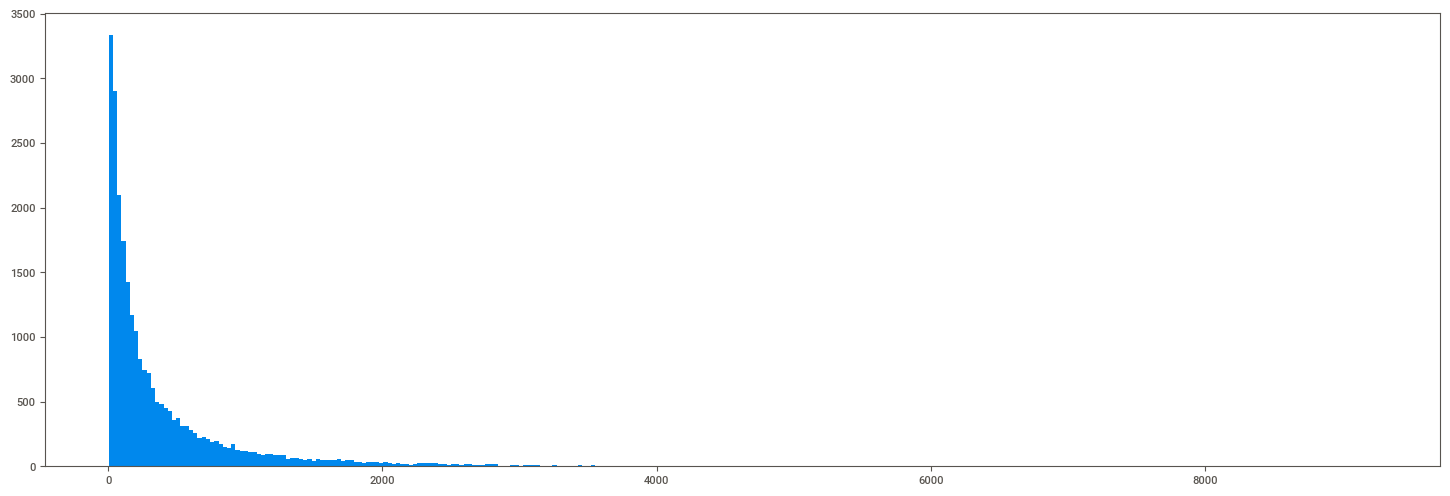

In [99]:
print_plot_token_num(new_review_df, "Review", 300)

# 文と文を結合

OwnerDetail:多言語、71

Description：多言語、260

PropertyType：英語、10

Amenities：英語、91

Review：多言語、493







In [100]:
all_df = pd.concat([train_df, test_df]).reset_index()

In [101]:
# 不要な文字を削除
all_df["Amenities"] = all_df["Amenities"].apply(lambda x: x.replace("[", "").replace('"', "").replace(',', "").replace(']', ""))

# np.nanを"NAN"に置換
all_df = all_df[["ID", "OwnerDetail", "Description", "PropertyType", "Amenities"]]
for col in ["OwnerDetail", "Description", "PropertyType", "Amenities"]:
    all_df = all_df.replace({col: {np.nan: 'NAN'}})

# 結合
text_list = []
for i in range(len(all_df)):
    text = "OwnerDetail: " + all_df["OwnerDetail"][i] + " Description: " + all_df["Description"][i]  + " PropertyType is " + all_df["PropertyType"][i]  + " Amenity is " + all_df["Amenities"][i] 
    text_list.append(text)
all_df["conbine_text"] = np.array(text_list)

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [ 336.  428.  623. 3192.]
Number of out of 512:  8244 (11.817829957424848%)
Number of out of 1024:  184 (0.26376524892845365%)


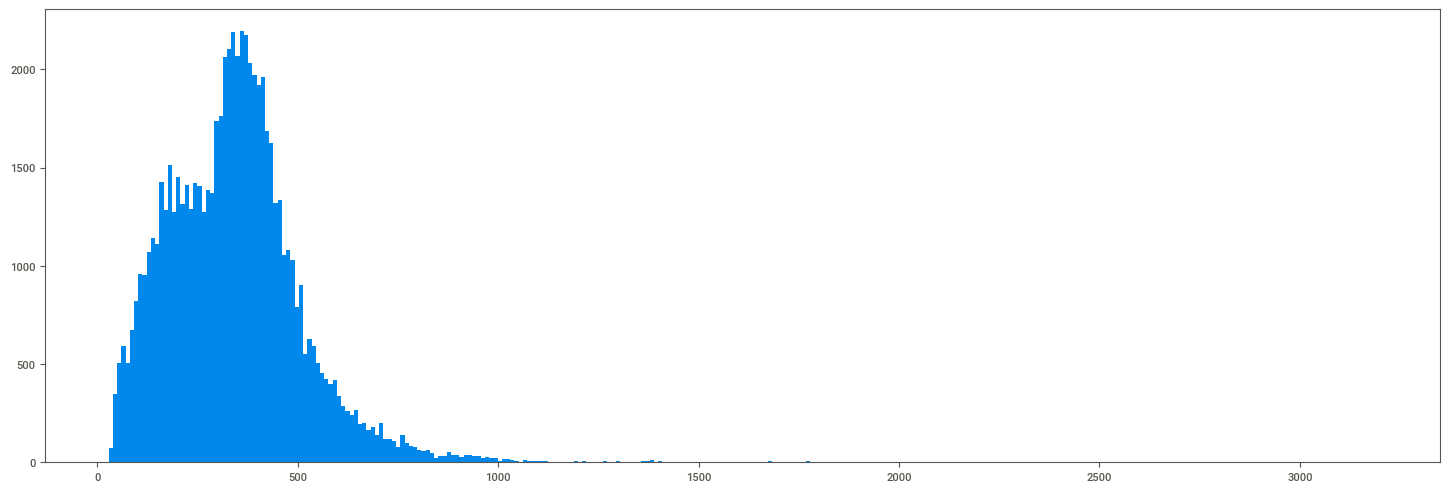

In [102]:
print_plot_token_num(all_df, "conbine_text", 300)

In [103]:
# 結合
text_list = []
for i in range(len(all_df)):
    text = "OwnerDetail: " + all_df["OwnerDetail"][i] + " Description: " + all_df["Description"][i]
    text_list.append(text)
all_df["conbine_text_OD_Ds"] = np.array(text_list)

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [ 261.  328.  518. 3079.]
Number of out of 512:  3645 (5.225132241001162%)
Number of out of 1024:  113 (0.16198626700497426%)


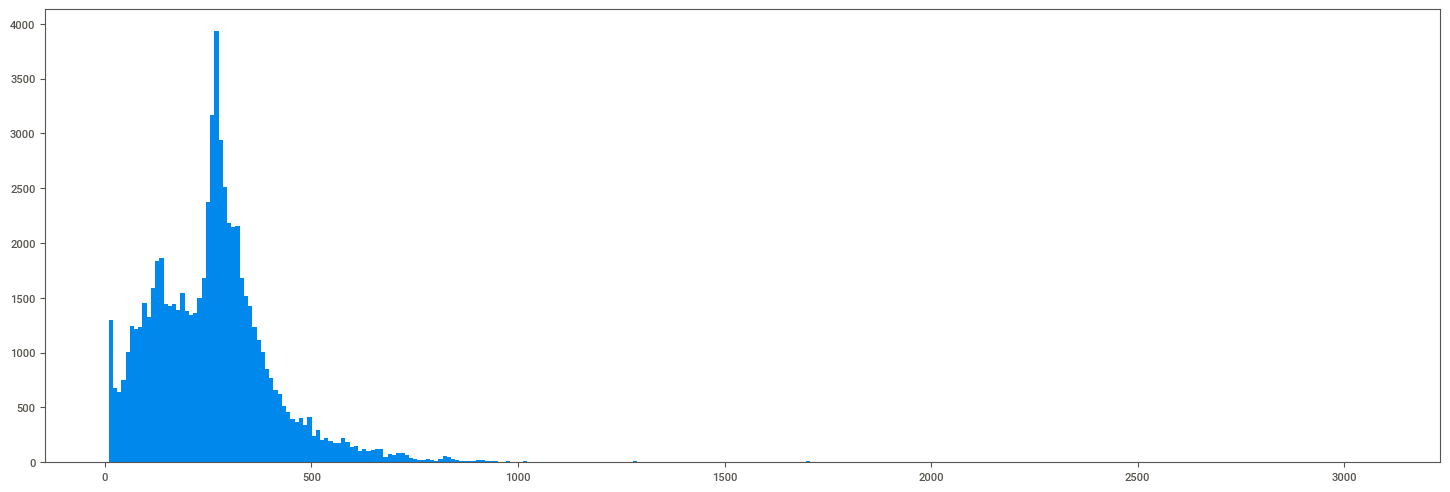

In [104]:
print_plot_token_num(all_df, "conbine_text_OD_Ds", 300)

In [105]:
text_list = []
for i in range(len(all_df)):
    text = " PropertyType is " + all_df["PropertyType"][i]  + " Amenity is " + all_df["Amenities"][i] 
    text_list.append(text)
all_df["conbine_text_PT_Am"] = np.array(text_list)

-------------------------------------------------------------------------------
50%点、75％点、95%点、最大値:  [ 77. 105. 163. 496.]
Number of out of 512:  0 (0.0%)
Number of out of 1024:  0 (0.0%)


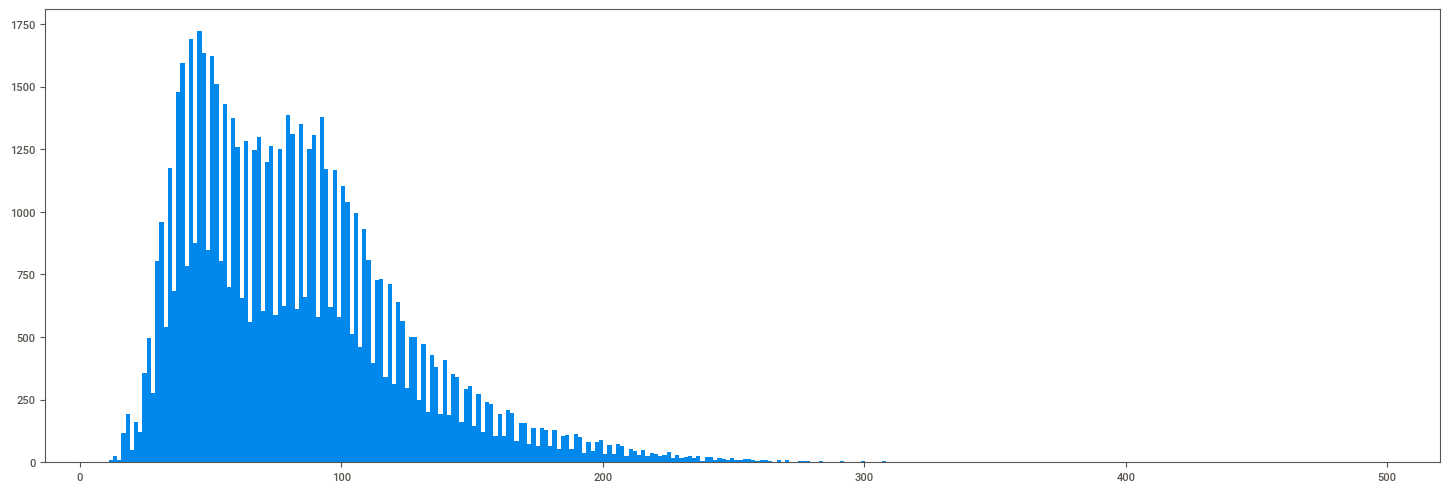

In [106]:
print_plot_token_num(all_df, "conbine_text_PT_Am", 300)